# Time series:


1) Measures need to be on equal intervals (aggregated to all the same level of time.

2) **Time series is naturally dependent**. Values typically influenced by performance in the previous period.
 Probability requires random samples. Basically violates any assumption needed for any kind of stat that relies on or is based in probability. Cant parametric stat or non parametric stat this**


---


# So, how we get this done - **the Assumption** - Data is Stationary **Stationary Stochastic Process**


---



>   Causes for Variations in the data **AKA VIOLATIONS OF THE ASSUMPTION **  

> Mainly focus on trend and seasonality corrections; white noise will determine if you can even go farther/ some processes cannot be modeled.


A) **Trend**: The long-term movement or direction in the data. It represents the general tendency for the data to increase or decrease over an extended period. For example, a time series of annual sales might show a gradual upward trend if sales are increasing year after year.


B) **Seasonality**: Regular and predictable patterns that repeat at consistent intervals, such as daily, monthly, or yearly. For instance, retail sales often show increased activity during the holiday season each year.


C) Cyclical Variation: Fluctuations that occur at irregular intervals, usually influenced by economic or business cycles. Unlike seasonality, which has a fixed period, cyclical variations can span varying lengths and are tied to broader economic conditions.

D) Irregular (or Residual) Variation: Unpredictable and random fluctuations that do not fit into trend, seasonal, or cyclical patterns. These variations are often considered noise or residuals after accounting for other components. For example, unexpected events like natural disasters or political upheavals can cause irregular variations in a time series.

E) Level: The average value around which the time series fluctuates. It's the baseline from which trend, seasonal, and cyclical variations are measured.

F) **White Noise:** The random variation in the data that can't be attributed to any specific pattern or systematic cause. It’s essentially the "background chatter" in the time series.

In [ ]:
#necesary libraries
!pip install statsmodels==0.14.2

In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.1 MB/s eta 0:00:00


In [ ]:
# Version check
import statsmodels

statsmodels.__version__

'0.14.2'

In [ ]:
import numpy as np

import pandas as pd

# Library to do data visualization
import matplotlib.pyplot as plt

# Library to do time series decomposition
import statsmodels.api as sm

# Module to create ACF and PACF plots
from statsmodels.graphics import tsaplots

# Module to build AR, MA, ARMA, and ARIMA models
from statsmodels.tsa.arima.model import ARIMA

# Module to implement MSE and RSME during model evaluation
from sklearn.metrics import mean_squared_error

# Code for ignoring unnecessary warnings while executing some code
import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# importing required libraries
import pandas as pd
import numpy as np
#point to your csv location;
#change your slashes or dashes/myd format as needed in the format, depends on current data coming through.
dateparse = lambda dates: pd.to_datetime(dates, format = '%m/%d/%Y')
df = pd.read_csv('/content/drive/MyDrive/Timeseries/Timeseries no negatives.csv', parse_dates=['date'], index_col='date',date_parser=dateparse)
#df = pd.read_csv('/content/drive/MyDrive/Timeseries/Timeseries no negatives.csv')
print(df)


            source  units country
date                             
2015-12-31   Field     73     USA
2016-01-31   Field     83     USA
2016-02-28   Field    106     USA
2016-03-31   Field     81     USA
2016-04-30   Field     96     USA
2016-05-31   Field     96     USA
2016-06-30   Field     80     USA
2016-07-31   Field    100     USA
2016-08-31   Field    138     USA
2016-09-30   Field    139     USA
2016-10-31   Field    201     USA
2016-11-30   Field    167     USA
2016-12-31   Field    220     USA
2017-01-31   Field    326     USA
2017-02-28   Field    111     USA
2017-03-31   Field    162     USA
2017-04-30   Field    157     USA
2017-05-31   Field    209     USA
2017-06-30   Field    109     USA
2017-07-31   Field    158     USA
2017-08-31   Field    176     USA
2017-09-30   Field    215     USA
2017-10-31   Field    325     USA
2017-11-30   Field    638     USA
2017-12-31   Field    448     USA
2018-01-31   Field    562     USA
2018-02-28   Field    360     USA
2018-03-31   F

In [ ]:
df.index

DatetimeIndex(['2015-12-31', '2016-01-31', '2016-02-28', '2016-03-31',
               '2016-04-30', '2016-05-31', '2016-06-30', '2016-07-31',
               '2016-08-31', '2016-09-30',
               ...
               '2024-05-01', '2024-05-01', '2024-06-01', '2024-06-01',
               '2024-06-01', '2024-06-01', '2024-07-01', '2024-07-01',
               '2024-07-01', '2024-07-01'],
              dtype='datetime64[ns]', name='date', length=323, freq=None)

In [ ]:
df1 = df.copy()

In [ ]:
df.isnull().sum()

,0
source,0
units,0
country,0


In [ ]:
# Filter rows where Country is USA and source is Sales
us_sales = df[(df['country'] == 'USA') & (df['source'] == 'Field')]

# Reset the index of the filtered DataFrame

print(us_sales)

           source  units country
date                            
2015-12-31  Field     73     USA
2016-01-31  Field     83     USA
2016-02-28  Field    106     USA
2016-03-31  Field     81     USA
2016-04-30  Field     96     USA
2016-05-31  Field     96     USA
2016-06-30  Field     80     USA
2016-07-31  Field    100     USA
2016-08-31  Field    138     USA
2016-09-30  Field    139     USA
2016-10-31  Field    201     USA
2016-11-30  Field    167     USA
2016-12-31  Field    220     USA
2017-01-31  Field    326     USA
2017-02-28  Field    111     USA
2017-03-31  Field    162     USA
2017-04-30  Field    157     USA
2017-05-31  Field    209     USA
2017-06-30  Field    109     USA
2017-07-31  Field    158     USA
2017-08-31  Field    176     USA
2017-09-30  Field    215     USA
2017-10-31  Field    325     USA
2017-11-30  Field    638     USA
2017-12-31  Field    448     USA
2018-01-31  Field    562     USA
2018-02-28  Field    360     USA
2018-03-31  Field    385     USA
2018-04-30

In [ ]:
# Dropping the variables,  only need the time and production information to build the model
columns_to_keep = ['units', 'date']
us_sales = us_sales[columns_to_keep]
print(us_sales)

     units       date
0       73 2015-12-31
1       83 2016-01-31
2      106 2016-02-28
3       81 2016-03-31
4       96 2016-04-30
5       96 2016-05-31
6       80 2016-06-30
7      100 2016-07-31
8      138 2016-08-31
9      139 2016-09-30
10     201 2016-10-31
11     167 2016-11-30
12     220 2016-12-31
13     326 2017-01-31
14     111 2017-02-28
15     162 2017-03-31
16     157 2017-04-30
17     209 2017-05-31
18     109 2017-06-30
19     158 2017-07-31
20     176 2017-08-31
21     215 2017-09-30
22     325 2017-10-31
23     638 2017-11-30
24     448 2017-12-31
25     562 2018-01-31
26     360 2018-02-28
27     385 2018-03-31
28     393 2018-04-30
29     543 2018-05-31
30     315 2018-06-30
31     350 2018-07-31
32     357 2018-08-31
33     341 2018-09-30
34     397 2018-10-31
35     823 2018-11-30
36     572 2018-12-31
37     401 2019-01-31
38     348 2019-02-28
39     380 2019-03-31
40     340 2019-04-30
41     528 2019-05-31
42     208 2019-06-30
43     102 2019-07-31
44    1467

adding in an additional date variable - this might mess everything up, but there have been a few functions where I have to go back and redate, it's annoying.

In [ ]:
us_view = us_sales.copy()

What's going on - basically, the order of the notebooks seems to be off for some - some split then visualize and decompose, one visualizes and decomposes before splitting the data, the other two do it after...

Visualizing Timeseries:

In [ ]:
# not sure why we do this, but adding an index?
us_sales = us_sales.reset_index()
us_sales=us_sales.set_index('date')
us_sales.head()

,index,units
date,,
2015-12-31,0,73
2016-01-31,1,83
2016-02-28,2,106
2016-03-31,3,81
2016-04-30,4,96


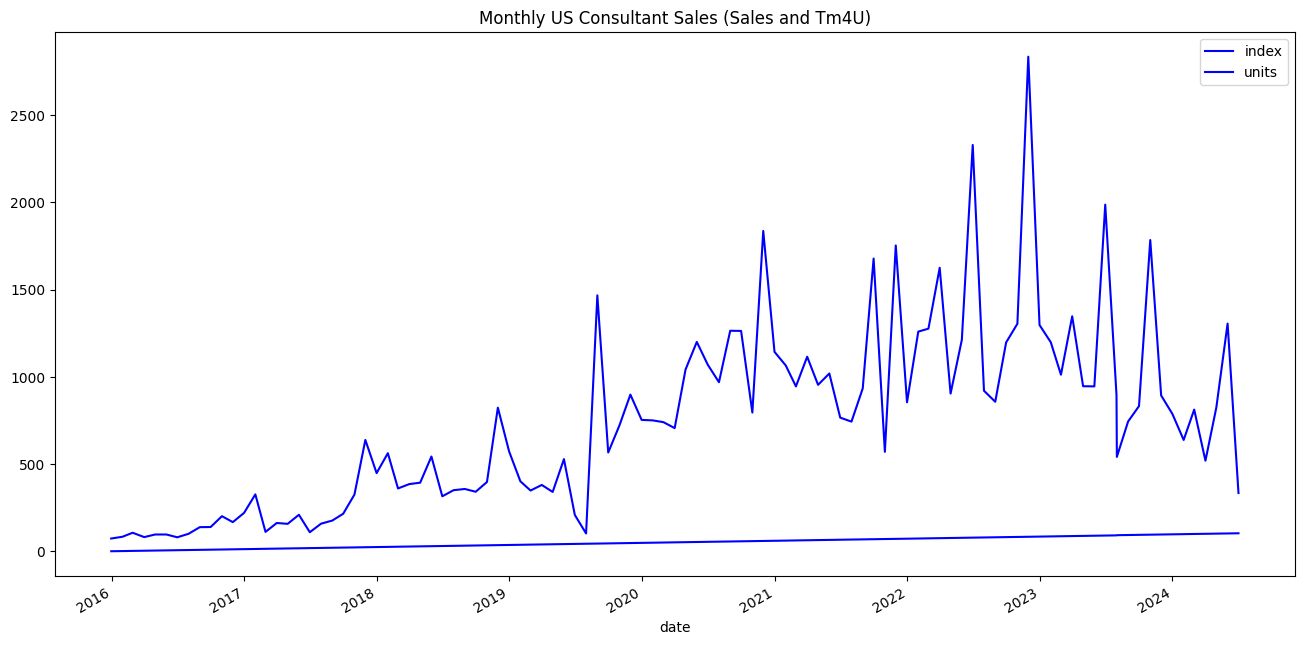

In [ ]:
#entire data set
ax = us_sales.plot(color = 'blue', figsize = (16, 8))

ax.set_title('Monthly US Consultant Sales (Sales and Tm4U)')

plt.show()

In [ ]:
# Dropping the variables,  only need the time and production information to build the model
columns_to_keep = ['units']
us_sales = us_sales[columns_to_keep]
print(us_sales)

            units
date             
2015-12-31     73
2016-01-31     83
2016-02-28    106
2016-03-31     81
2016-04-30     96
2016-05-31     96
2016-06-30     80
2016-07-31    100
2016-08-31    138
2016-09-30    139
2016-10-31    201
2016-11-30    167
2016-12-31    220
2017-01-31    326
2017-02-28    111
2017-03-31    162
2017-04-30    157
2017-05-31    209
2017-06-30    109
2017-07-31    158
2017-08-31    176
2017-09-30    215
2017-10-31    325
2017-11-30    638
2017-12-31    448
2018-01-31    562
2018-02-28    360
2018-03-31    385
2018-04-30    393
2018-05-31    543
2018-06-30    315
2018-07-31    350
2018-08-31    357
2018-09-30    341
2018-10-31    397
2018-11-30    823
2018-12-31    572
2019-01-31    401
2019-02-28    348
2019-03-31    380
2019-04-30    340
2019-05-31    528
2019-06-30    208
2019-07-31    102
2019-08-31   1467
2019-09-30    566
2019-10-31    722
2019-11-30    898
2019-12-31    753
2020-01-31    750
2020-02-29    740
2020-03-31    706
2020-04-30   1042
2020-05-31

In [ ]:
us_sales = us_sales.reset_index()

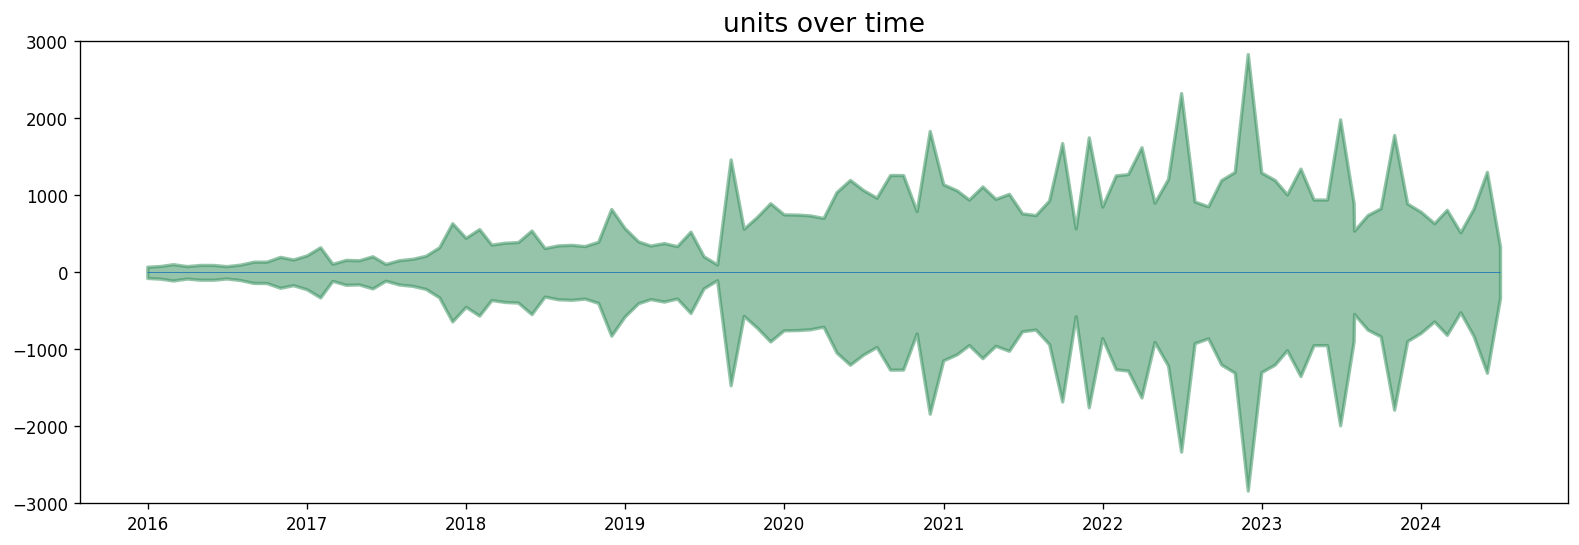

In [ ]:
#emphasizes growth:
x = us_sales['date'].values
y1 = us_sales['units'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
plt.ylim(-3000, 3000)
plt.title('units over time', fontsize=16)
plt.hlines(y=0, xmin=np.min(us_sales.date), xmax=np.max(us_sales.date), linewidth=.5)
plt.show()

In [ ]:
#because Im lazy and didnt copy the date variable/I just keep dropping and converting the date index
#step prior to the growth plot
us_sales['date'] = pd.to_datetime(us_sales['date'])

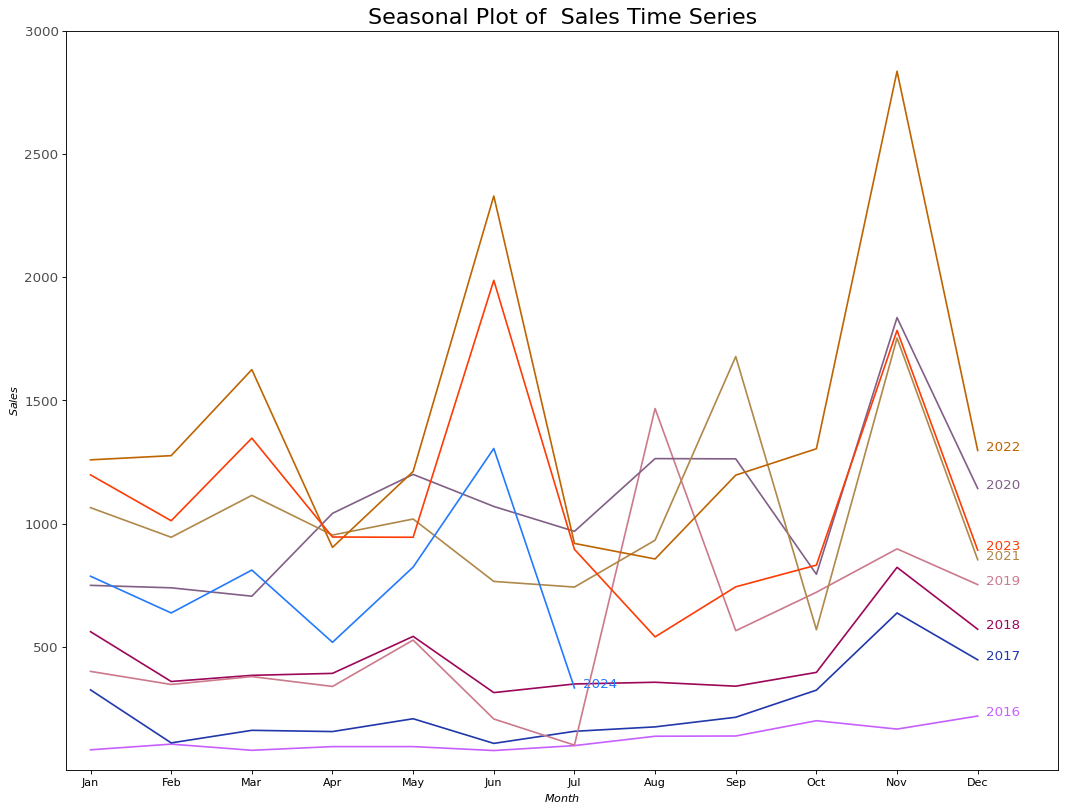

In [ ]:
#Visualize the seasonality of the time series
import matplotlib.pyplot as plt
import matplotlib as mpl # Import matplotlib with alias mpl
df = us_sales.copy()
# Prepare data
us_sales['year'] = [d.year for d in us_sales.date]
us_sales['month'] = [d.strftime('%b') for d in us_sales.date]
years = us_sales['year'].unique()

# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(16,12), dpi= 80)
for i, y in enumerate(years):
    if i > 0:
        plt.plot('month', 'units', data=df.loc[df.year==y, :], color=mycolors[i], label=y)
        plt.text(df.loc[df.year==y, :].shape[0]-.9, df.loc[df.year==y, 'units'][-1:].values[0], y, fontsize=12, color=mycolors[i])

# Decoration
plt.gca().set(xlim=(-0.3, 12), ylim=(2, 3000), ylabel='$ Sales$', xlabel='$Month$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of  Sales Time Series", fontsize=20)
plt.show()

im just going to take the monthly totals across the applicable years for the average, weight it so that hte last year of observation is more heavily considered.

sum(may)/time periods * time period weight + sum(may)/Time periods*time period weight  OR

may22x*.3 may23*.3 + may24*.4.

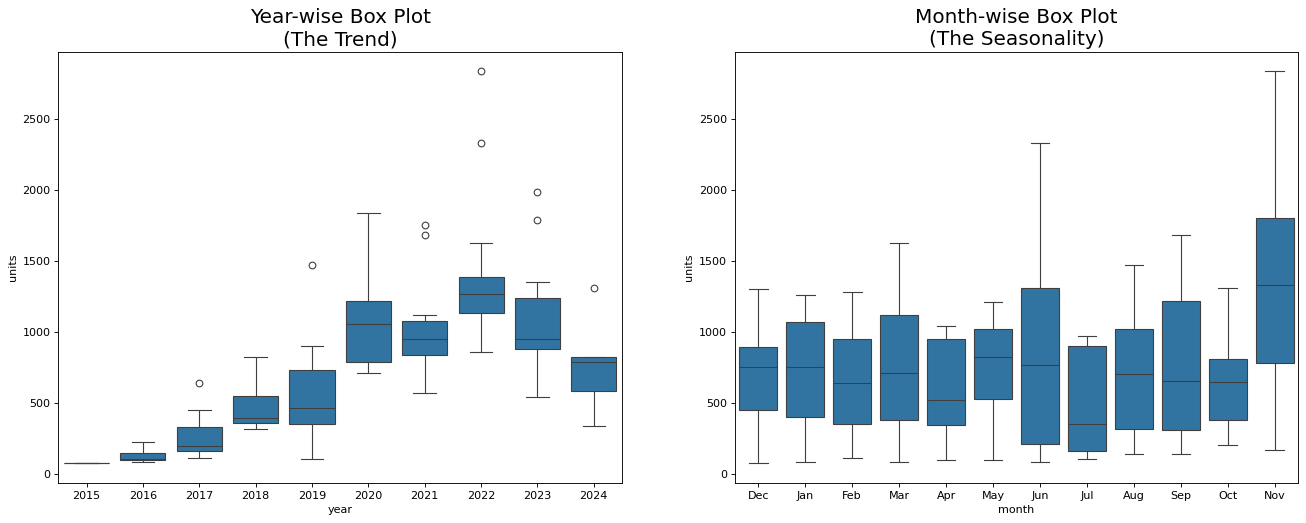

In [ ]:
import seaborn as sns
#box plot of Month (seasonal) and year(trend) distributions
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='units', data=us_sales, ax=axes[0])
sns.boxplot(x='month', y='units', data=us_sales.loc[~df.year.isin([1991, 2008]), :])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18);
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

Canada and the US are going to have different seasonal patterns, from what I seeing you will see the AUGUST pattern more isolated to canada***
September pattern is in the US, not sure if we will see it on the CA data set b/c of how Im seeing the pattern w August and the US/ vs all data

The VIAN happens Sept October  (how long into oct, maybe thats why there isnt a pattern. )
Grand prix is is May and June (last week only of may** why May doesnt pop as much)


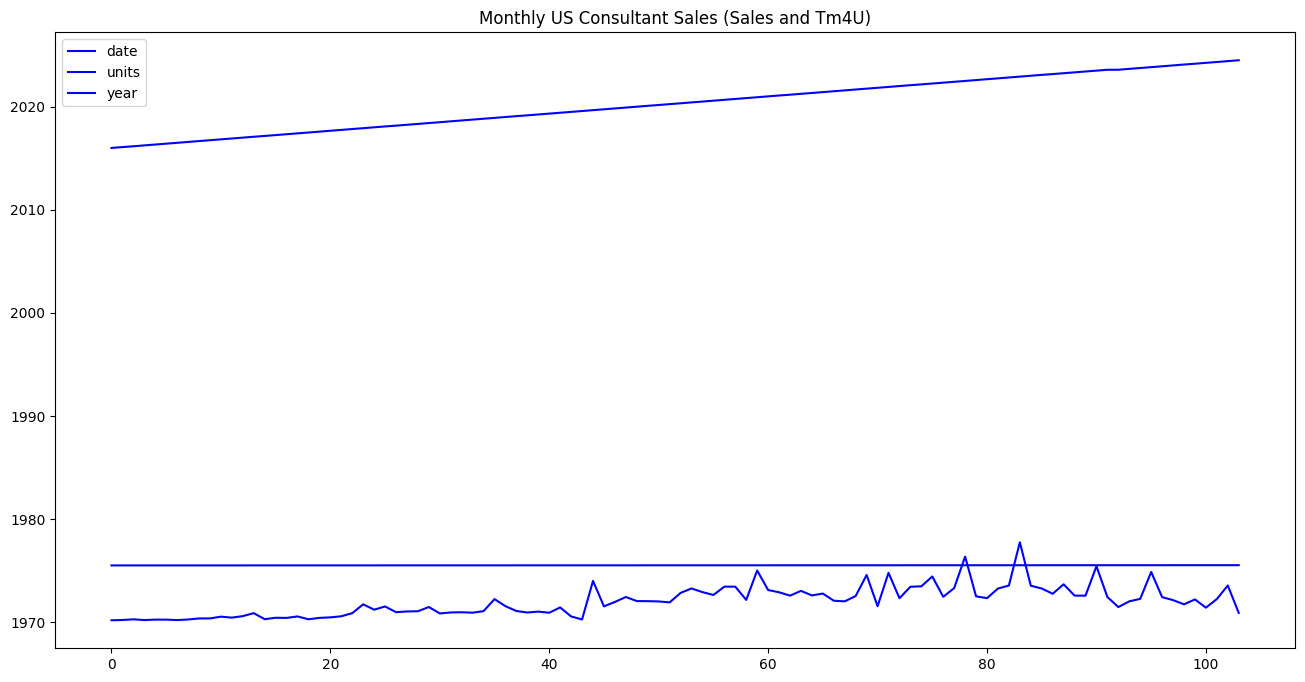

In [ ]:
#entire data set
ax = us_sales.plot(color = 'blue', figsize = (16, 8))

ax.set_title('Monthly US Consultant Sales (Sales and Tm4U)')

plt.show()

SPLIT  -- testing predictions on different splits, basically, if the period is atypical of your trend it should be excluded, im trying to pin down if/when the pandemic trend occurred for us, aiming to tie it into inflation - why?

Summary
Independent contractors were eligible for PPP loans under the CARES Act and subsequent legislation. They needed to provide documentation of their net income, apply using a simplified form, and ensure that the funds were used for eligible expenses to qualify for forgiveness. The application process was designed to be accessible for self-employed individuals, offering critical financial support during the pandemic.

Cannibalization probs needs to be calculated/tagged - consultant purchases of units by the consultant themselves as well.

# **TESTING TRAINING DATA SET CREATION**

In [ ]:
# not sure why we do this, but adding an index?
us_sales = us_sales.reset_index()
#us_sales=us_sales.set_index('date')
us_sales.head()

,date,units
0,12/31/2015,73
1,1/31/2016,83
2,2/28/2016,106
3,3/31/2016,81
4,4/30/2016,96


In [ ]:
us_sales['date'] = pd.to_datetime(us_sales['date'])

In [ ]:
# Limiting Pandemic to only INITIAL money injection time period* Last PPP occurs March 11 2021 (ARPA)
# Define the pandemic period
pandemic_start = pd.to_datetime('2020-03-01')
pandemic_end = pd.to_datetime('2021-04-30')

In [ ]:
# Limiting Pandemic to assumed money injection time period* How long would the money last for? a year after?
# Define the pandemic period
pandemic_start_inf = pd.to_datetime('2020-03-01')
pandemic_end_inf = pd.to_datetime('2023-01-01')

In [ ]:
us_timeseries_exc2021 = us_sales[(us_sales['date'] < pandemic_start) | (us_sales['date'] > pandemic_end)]

In [ ]:
us_timeseries_exc2022 = us_sales[(us_sales['date'] < pandemic_start_inf) | (us_sales['date'] > pandemic_end_inf)]

In [ ]:
#used first iteration (train data all and train data 1) to determine time frames. 10.2021 onwards seems stable/ back to pattern, but could tighten it up to 2022
#train_data_all  = us_sales[(us_sales['date'] < '2022-01-01')]
#train_data_1 = us_timeseries_exc2021[(us_timeseries_exc2021['date'] < '2020-03-01' )]
train_data_2 = us_sales[(us_sales['date'] >= '2021-10-01' )& (us_sales['date'] <= '2023-11-01' )]

In [ ]:
#used the first iteration to deterime proper testing time frames
#test_data_all  = us_sales[(us_sales['date'] >= '2022-01-01')]
#test_data_1 = us_timeseries_exc2021[(us_timeseries_exc2021['date'] >='2020-03-01' )]
test_data_2 = us_sales[(us_sales['date'] > '2023-11-01' )]

In [ ]:
print(train_data_2)

         date  units  year month
70 2021-10-31    570  2021   Oct
71 2021-11-30   1753  2021   Nov
72 2021-12-31    854  2021   Dec
73 2022-01-31   1259  2022   Jan
74 2022-02-28   1276  2022   Feb
75 2022-03-31   1625  2022   Mar
76 2022-04-30    904  2022   Apr
77 2022-05-31   1212  2022   May
78 2022-06-30   2329  2022   Jun
79 2022-07-31    920  2022   Jul
80 2022-08-31    857  2022   Aug
81 2022-09-30   1197  2022   Sep
82 2022-10-31   1304  2022   Oct
83 2022-11-30   2835  2022   Nov
84 2022-12-31   1297  2022   Dec
85 2023-01-31   1198  2023   Jan
86 2023-02-28   1012  2023   Feb
87 2023-03-31   1347  2023   Mar
88 2023-04-30    946  2023   Apr
89 2023-05-31    945  2023   May
90 2023-06-30   1987  2023   Jun
91 2023-07-31    896  2023   Jul
92 2023-08-01    541  2023   Aug
93 2023-09-01    744  2023   Sep
94 2023-10-01    832  2023   Oct


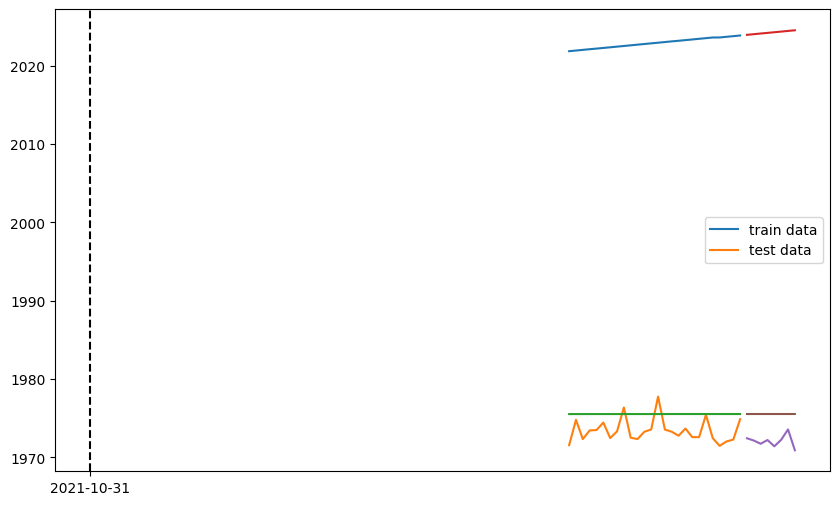

In [ ]:
# Creating a subplot space
fig, ax = plt.subplots(figsize = (10, 6))

# Plotting train data
train_data_2.plot(ax = ax)

# Plotting test data
test_data_2.plot(ax = ax)

# Adding the legends in sequential order
plt.legend(['train data', 'test data'])

# Showing the time which divides the original data into train and test
plt.axvline(x = '2021-10-31', color = 'black', linestyle = '--')

# Showing the plot
plt.show()

In [ ]:
# Dropping the variables,  only need the time and production information to build the model
columns_to_keep = ['units', 'date']
tu = train_data_2[columns_to_keep]
print(tu)

    units       date
70    570 2021-10-31
71   1753 2021-11-30
72    854 2021-12-31
73   1259 2022-01-31
74   1276 2022-02-28
75   1625 2022-03-31
76    904 2022-04-30
77   1212 2022-05-31
78   2329 2022-06-30
79    920 2022-07-31
80    857 2022-08-31
81   1197 2022-09-30
82   1304 2022-10-31
83   2835 2022-11-30
84   1297 2022-12-31
85   1198 2023-01-31
86   1012 2023-02-28
87   1347 2023-03-31
88    946 2023-04-30
89    945 2023-05-31
90   1987 2023-06-30
91    896 2023-07-31
92    541 2023-08-01
93    744 2023-09-01
94    832 2023-10-01
95   1784 2023-11-01


# **BEGIN STATIONARITY CHECKS**

What to check for/what stationarity is:

constant mean

constant variance

an autocovariance that does not depend on time.

1. Trend

In [ ]:
tu = tu.set_index('date')
print(tu)

            units
date             
2021-10-31    570
2021-11-30   1753
2021-12-31    854
2022-01-31   1259
2022-02-28   1276
2022-03-31   1625
2022-04-30    904
2022-05-31   1212
2022-06-30   2329
2022-07-31    920
2022-08-31    857
2022-09-30   1197
2022-10-31   1304
2022-11-30   2835
2022-12-31   1297
2023-01-31   1198
2023-02-28   1012
2023-03-31   1347
2023-04-30    946
2023-05-31    945
2023-06-30   1987
2023-07-31    896
2023-08-01    541
2023-09-01    744
2023-10-01    832
2023-11-01   1784


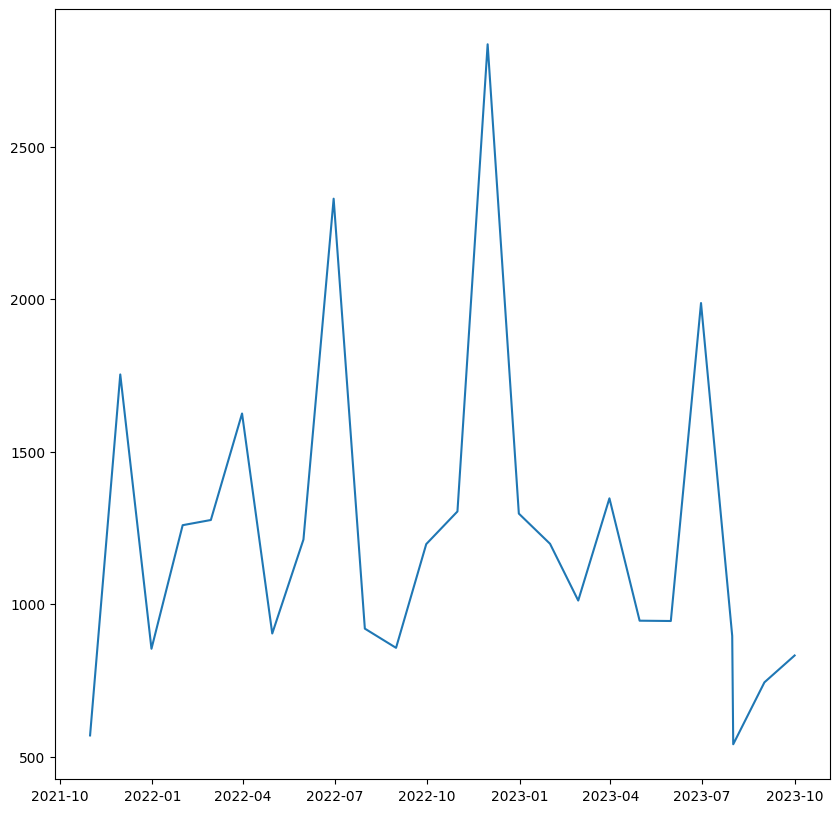

In [ ]:
#visualize original time series
plt.plot(tu)


how to check for stationarity:
Plotting rolling statistics
Dickey Fuller test, CV > TS at different confidence levels to reject null.

In [ ]:
#alternate code for the Df test from : https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

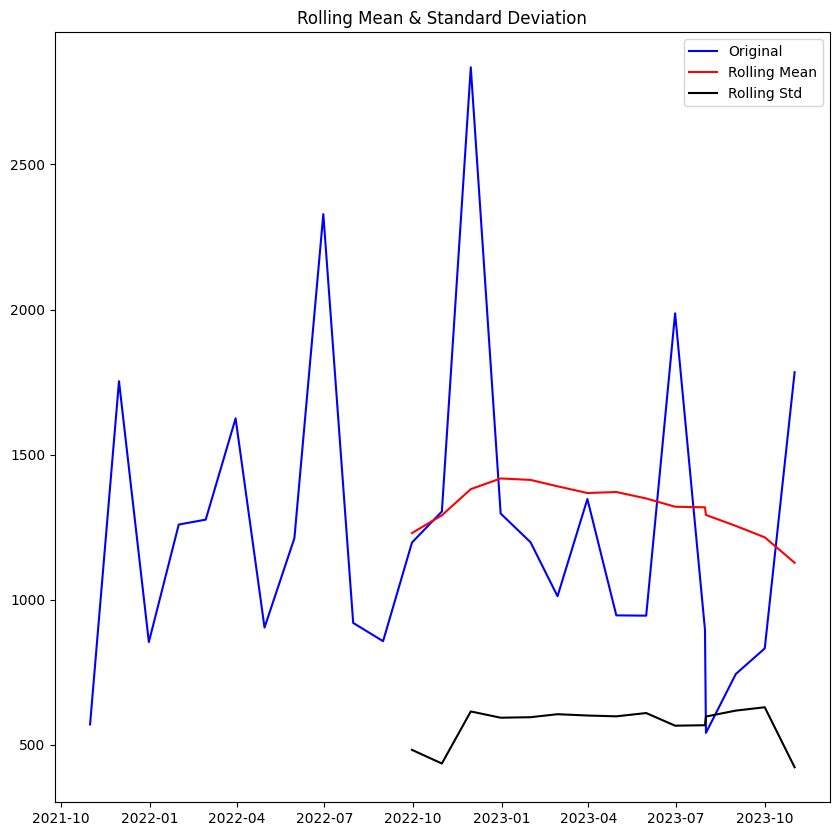

Results of Dickey-Fuller Test:
Test Statistic                 -5.271720
p-value                         0.000006
#Lags Used                      0.000000
Number of Observations Used    25.000000
Critical Value (1%)            -3.723863
Critical Value (5%)            -2.986489
Critical Value (10%)           -2.632800
dtype: float64


In [ ]:
test_stationarity(tu)

test statistic is actually less than the critical alue (yes , for the comparisons, use the signed values above/ normal negative number interpretation)

variation in the rolling mean and the standard deviation is kinda small

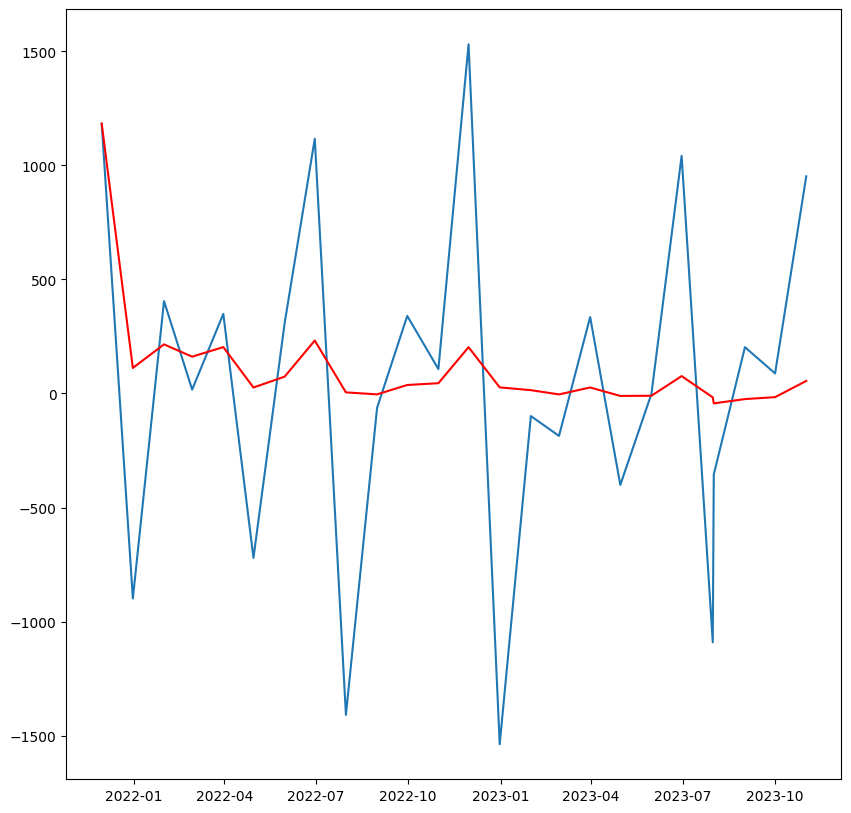

In [ ]:
#weighting model so most recent observations are more heavily considered
from statsmodels.tsa.holtwinters import ExponentialSmoothing
# Use the ewma method on the pandas Series object
expwighted_avg = tu_dif.ewm(halflife=12).mean()
plt.plot(tu_dif)
plt.plot(expwighted_avg, color='red')

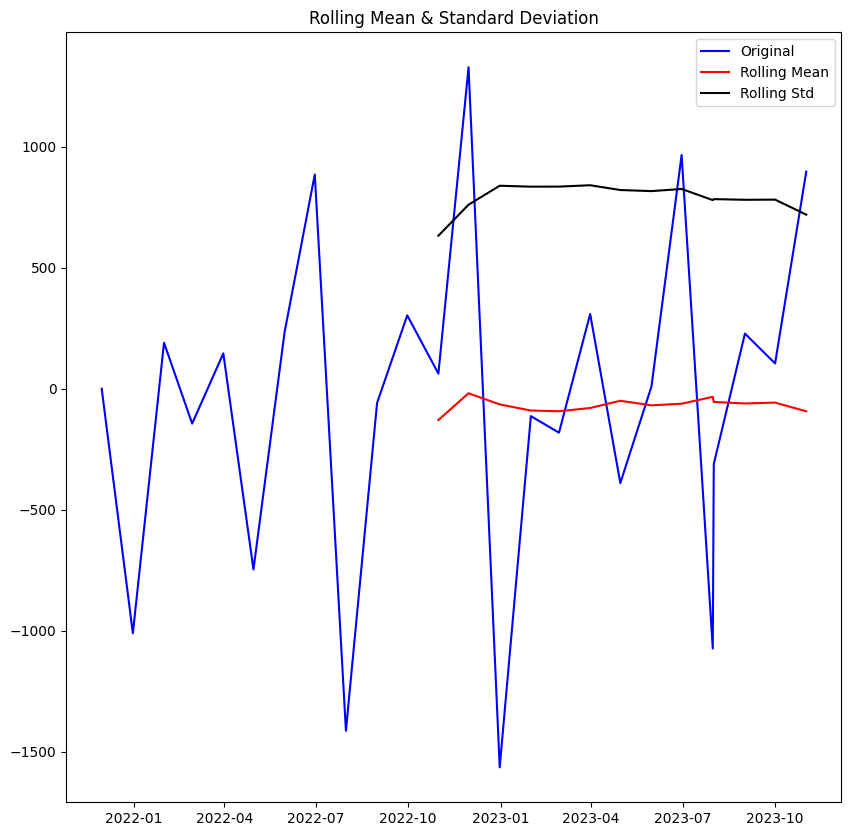

Results of Dickey-Fuller Test:
Test Statistic                 -4.652000
p-value                         0.000103
#Lags Used                      3.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [ ]:
ts_log_ewma_diff = tu_dif.dropna() - expwighted_avg.dropna()
test_stationarity(ts_log_ewma_diff)

In [ ]:
# Extract fitted values or residuals from the ARIMA results
fitted_values = ar_1_results.fittedvalues  # Or use ar_1_results.resid for residuals

# Perform the addition with the extracted values
result = ts_log_ewma_diff + fitted_values  # Or use ts_log_ewma_diff + ar_1_results.resid

print(result)

            2021-10-31 00:00:00  2021-11-30 00:00:00  2021-12-31 00:00:00  \
date                                                                        
2021-11-30                  NaN                  NaN                  NaN   
2021-12-31                  NaN                  NaN                  NaN   
2022-01-31                  NaN                  NaN                  NaN   
2022-02-28                  NaN                  NaN                  NaN   
2022-03-31                  NaN                  NaN                  NaN   
2022-04-30                  NaN                  NaN                  NaN   
2022-05-31                  NaN                  NaN                  NaN   
2022-06-30                  NaN                  NaN                  NaN   
2022-07-31                  NaN                  NaN                  NaN   
2022-08-31                  NaN                  NaN                  NaN   
2022-09-30                  NaN                  NaN                  NaN   

**Estimating and eliminated seasonality (cause there really isnt a trend/ stationarity has been confirmed).**

Differencing – taking the difference with a particular time lag

Decomposition – modeling both trend and seasonality and removing them from the model

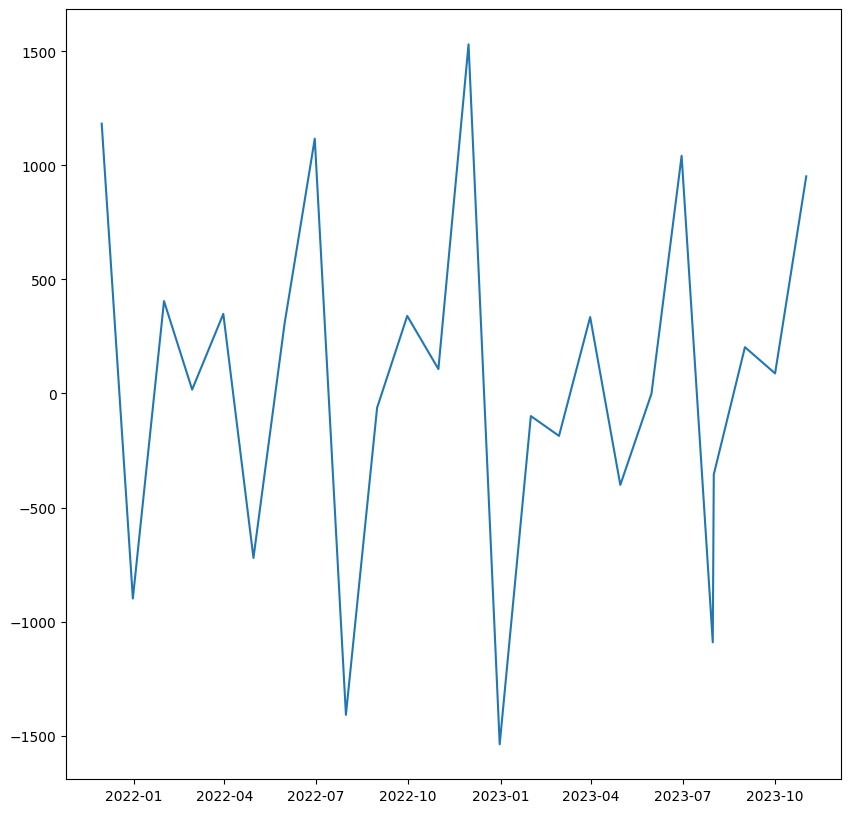

In [ ]:
#Differencing
tu_dif = tu - tu.shift()
plt.plot(tu_dif)

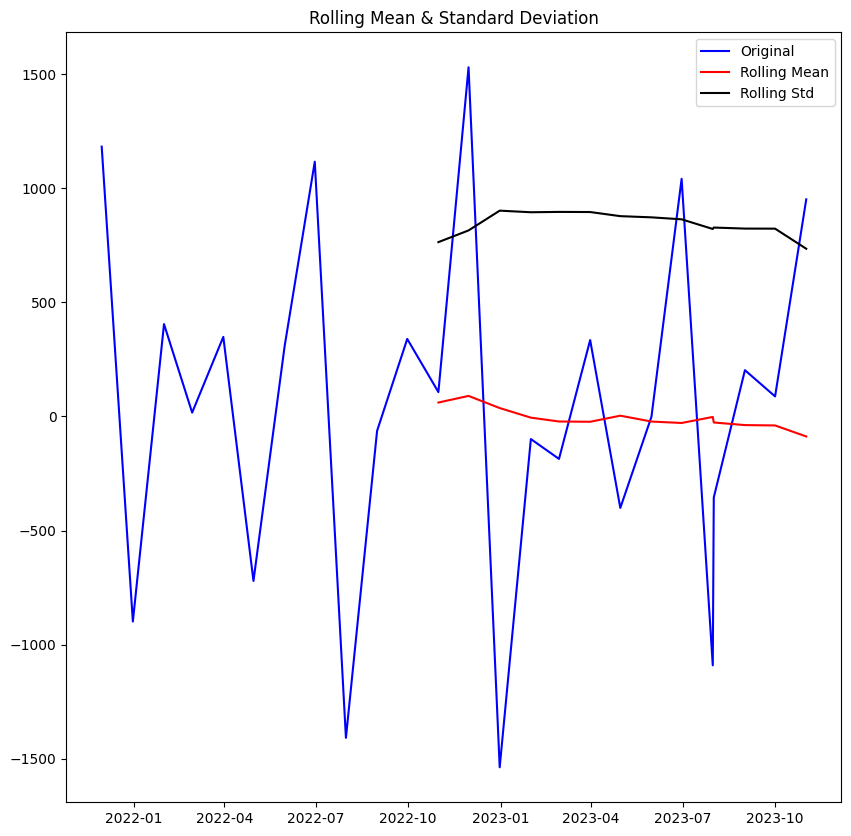

Results of Dickey-Fuller Test:
Test Statistic                 -4.575762
p-value                         0.000143
#Lags Used                      3.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


In [ ]:
#second order differencing work?
test_stationarity(tu_dif.dropna())

Yes. first order difference works so far... doesnt work later on.

Tesing second order differencing now

Decompose

Is there a deterministic trend in this series? That is, do you suspect that the series will bounce back to the trend exhibited before January 2001?

Or has there been a fundamental change to the process generating this series and a new trend will start (i.e. the trend is stochastic)?

**DECOMPOSE YOUR TIME SERIES**

https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html

Seasonal decomposition using moving averages.

# **Parameters**¶
**x** array_like
Time series. If 2d, individual series are in columns. x must contain 2 complete cycles.

**model ** {“additive”, “multiplicative”}, optional
Type of seasonal component. Abbreviations are accepted.

**filt** array_like, optional
The filter coefficients for filtering out the seasonal component. The concrete moving average method used in filtering is determined by two_sided.

**period** int, optional
Period of the series (eg, 1 for annual, 4 for quarterly, etc). Must be used if x is not a pandas object or if the index of x does not have a frequency. Overrides default periodicity of x if x is a pandas object with a timeseries index.

**two_sided** bool, optional
The moving average method used in filtering. If True (default), a centered moving average is computed using the filt. If False, the filter coefficients are for past values only.

**extrapolate_trend** int or ‘freq’, optional
If set to > 0, the trend resulting from the convolution is linear least-squares extrapolated on both ends (or the single one if two_sided is False) considering this many (+1) closest points. If set to ‘freq’, use freq closest points. Setting this parameter results in no NaN values in trend or resid components.

**Returns¶**
DecomposeResult
A object with seasonal, trend, and resid attributes.

In [ ]:
print(tu_sdif.dropna())

             units
date              
2021-12-31 -2082.0
2022-01-31  1304.0
2022-02-28  -388.0
2022-03-31   332.0
2022-04-30 -1070.0
2022-05-31  1029.0
2022-06-30   809.0
2022-07-31 -2526.0
2022-08-31  1346.0
2022-09-30   403.0
2022-10-31  -233.0
2022-11-30  1424.0
2022-12-31 -3069.0
2023-01-31  1439.0
2023-02-28   -87.0
2023-03-31   521.0
2023-04-30  -736.0
2023-05-31   400.0
2023-06-30  1043.0
2023-07-31 -2133.0
2023-08-01   736.0
2023-09-01   558.0
2023-10-01  -115.0
2023-11-01   864.0


In [ ]:
# Using seasonal_decompose function to decompose the time series into its individual components
#periods: 12 = Month, 3 = quarter, 30.5 = daily **
decomposition = sm.tsa.seasonal_decompose(tu_dif.dropna(), period=12)

In [ ]:
# Creating an empty dataframe to store the individual components
decomposed_data = pd.DataFrame()

# Extracting the trend component of time series
decomposed_data['trend'] = decomposition.trend

# Extracting the seasonal component of time series
decomposed_data['seasonal'] = decomposition.seasonal

# Extracting the white noise or residual component of time series
decomposed_data['random_noise'] = decomposition.resid

<Axes: xlabel='date'>

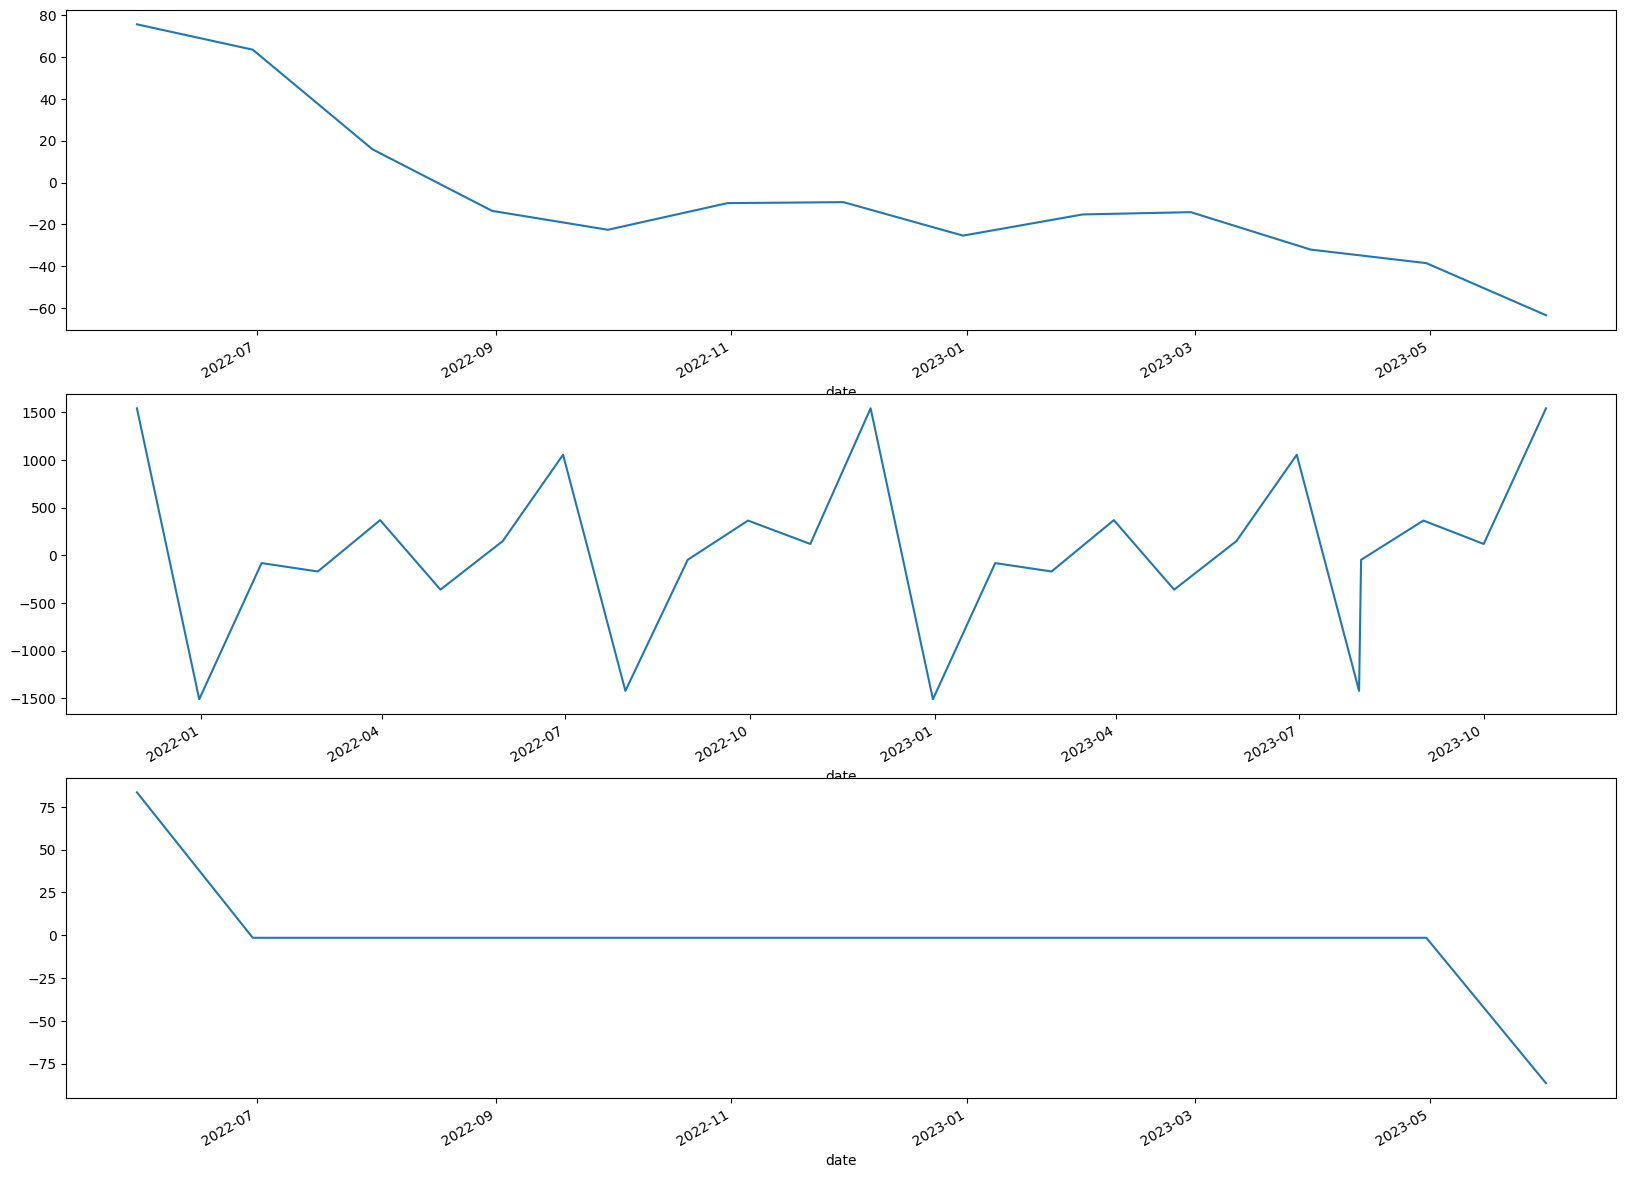

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (20, 16))

decomposed_data['trend'].plot(ax = ax1)

decomposed_data['seasonal'].plot(ax = ax2)

decomposed_data['random_noise'].plot(ax = ax3)

Check seasonality on residuals

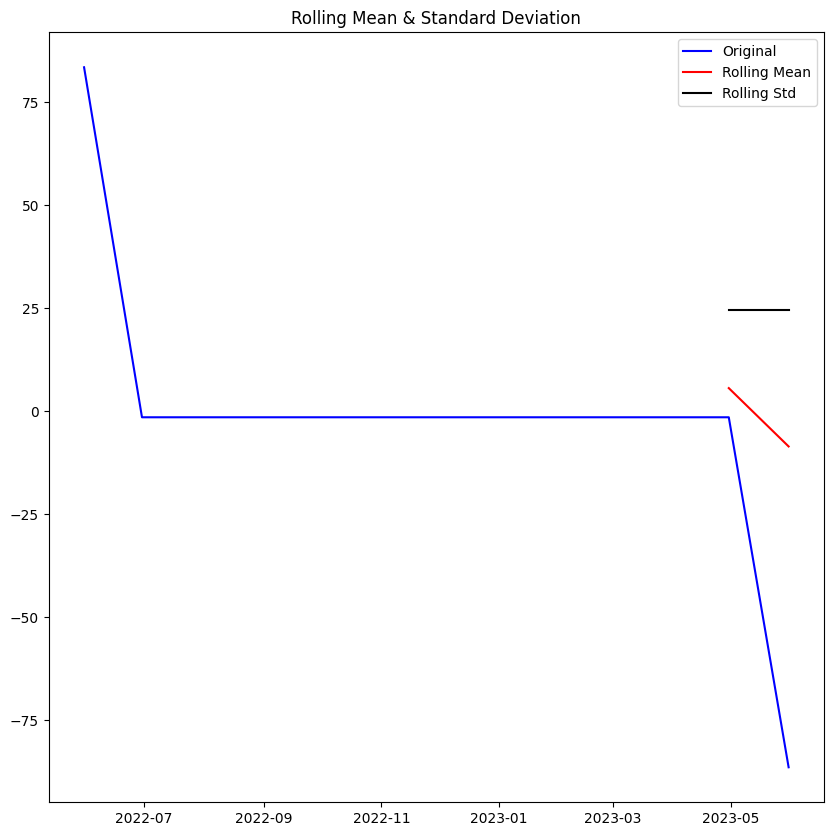

Results of Dickey-Fuller Test:
Test Statistic                -0.006035
p-value                        0.958030
#Lags Used                     3.000000
Number of Observations Used    9.000000
Critical Value (1%)           -4.473135
Critical Value (5%)           -3.289881
Critical Value (10%)          -2.772382
dtype: float64


In [ ]:
ts_log_decompose = decomposed_data['random_noise']
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

yes, it has to be the second order differnce. stop freaking out.

No matter how powerful they get, machine learning algorithms cannot predict everything. A well-known area where ML algorithms can become pretty helpless is time series forecasting. Despite the availability of a large suite of autoregressive models and many other algorithms for time series forecasting, we cannot predict the target distribution if it is White Noise or follows a Random Walk. So, we must first detect such unpredictable distributions before making any further efforts.

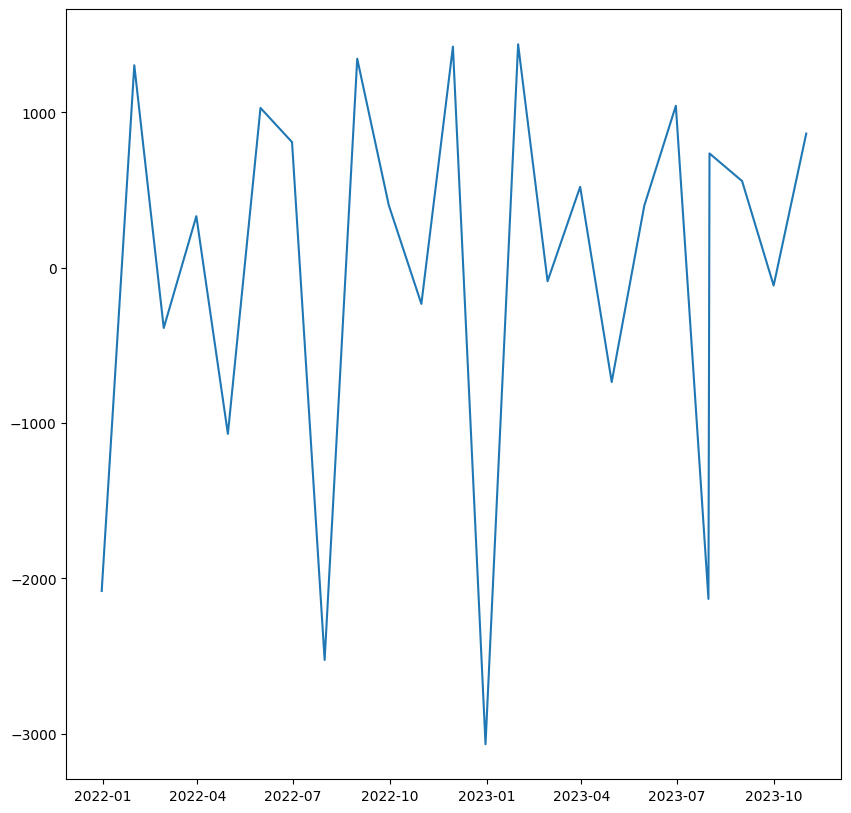

In [ ]:
#ultimately used differencing because we dont have a trend but we do have seasonality/ it handles both
#Doing flat second order Differencing cause I cant figure out the additive transformation.. forgot to rename this....
tu_sdif = tu_dif - tu_dif.shift()
plt.plot(tu_sdif)

We saw different techniques and all of them worked reasonably well for making the TS stationary. Lets make model on the TS after differencing as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

A strictly stationary series with no dependence among the values. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
A series with significant dependence among values. In this case we need to use some statistical models like ARIMA to forecast the data.
Let me give you a brief introduction to ARIMA. I won’t go into the technical details but you should understand these concepts in detail if you wish to apply them more effectively. ARIMA stands for Auto-Regressive Integrated Moving Averages. The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

Number of AR (Auto-Regressive) terms (p): AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
Number of MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
Number of Differences (d): These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.
An importance concern here is how to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. Lets discuss them first.

Autocorrelation Function (ACF): It is a measure of the correlation between the the TS with a lagged version of itself. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
Partial Autocorrelation Function (PACF): This measures the correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

tldnr: use your ACF and PACF plots to determine the p and Q terms for your ARIMA model

In [ ]:
ts_log_diff = tu_sdif.dropna().copy()

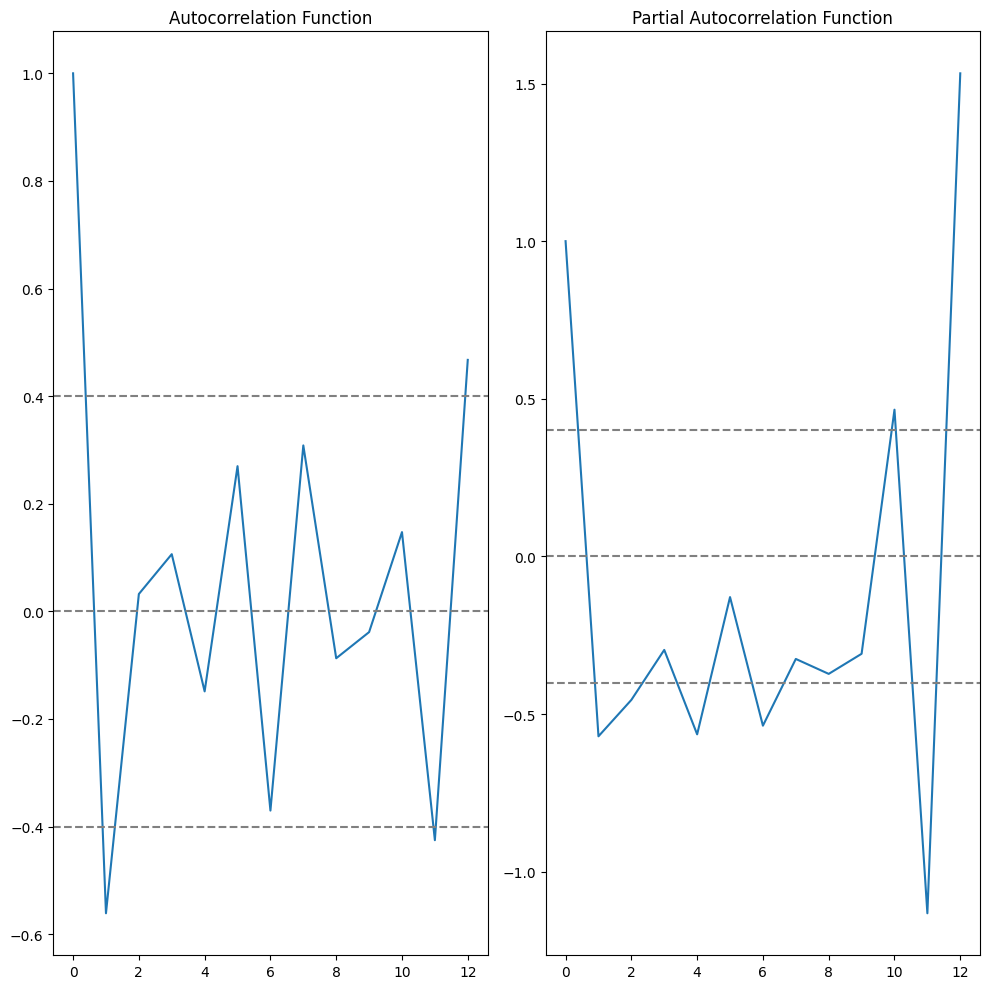

In [ ]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=12)
lag_pacf = pacf(ts_log_diff, nlags=12, method='ols')
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=1.
q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

Text(0.5, 1.0, 'RSS: 45858893.3958')

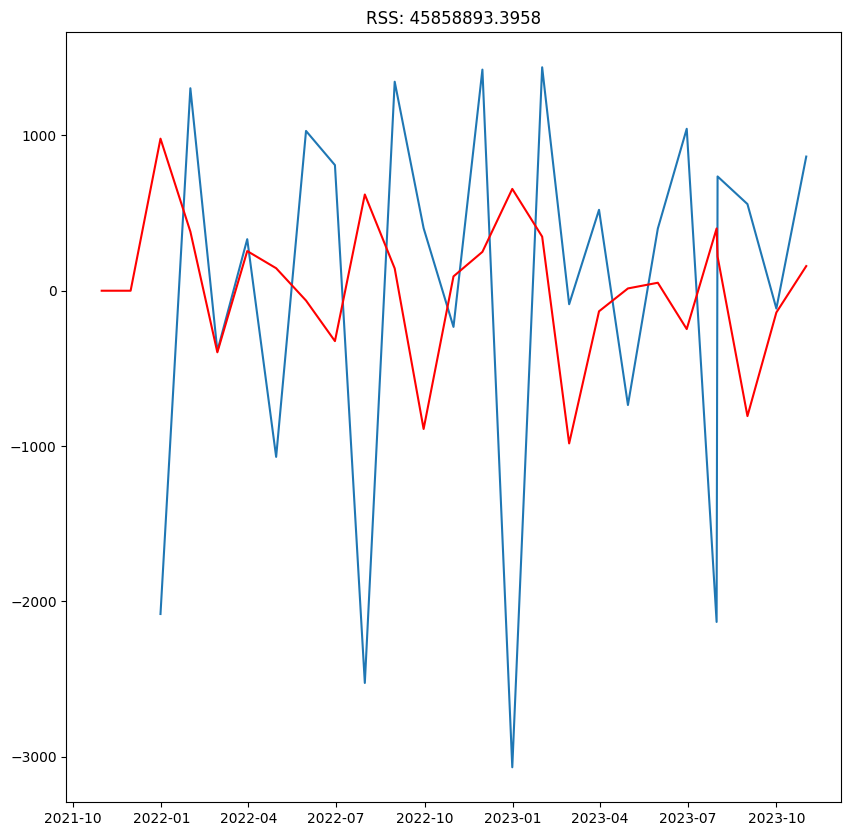

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # Use the new import path
# d = 2, second order differencing
model = ARIMA(tu_dif, order=(1, 1, 0))
results_AR = model.fit()  # Remove the disp argument

# Extract the values from the time series and fitted values as NumPy arrays
ts_log_diff_values = ts_log_diff.values.flatten()

# Trim the fitted values to match the length of the original time series
fitted_values = results_AR.fittedvalues.values[:len(ts_log_diff_values)]  # Trim fitted values

# Calculate the RSS using the NumPy arrays
rss = np.sum((fitted_values - ts_log_diff_values)**2)

plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % rss)

Text(0.5, 1.0, 'RSS: 69317996.8920')

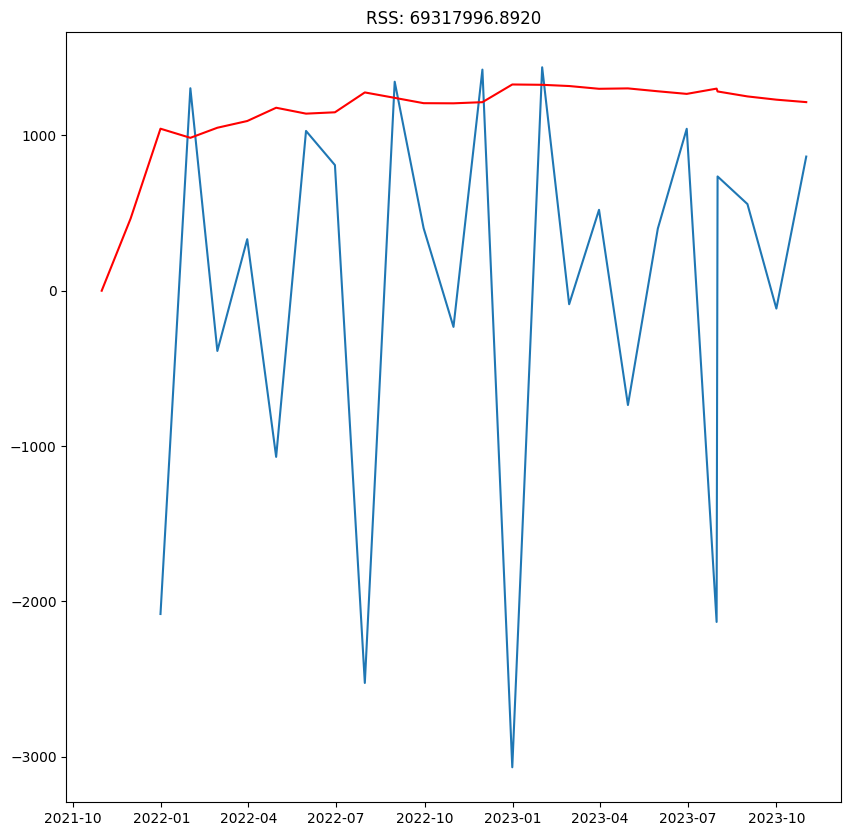

In [ ]:
from statsmodels.tsa.arima.model import ARIMA # Use the new import path

model = ARIMA(tu, order=(0, 1, 1))
results_MA = model.fit()

# Extract values as NumPy arrays for calculation
ts_log_diff_values = ts_log_diff.values.flatten()
fitted_values = results_MA.fittedvalues.values[:len(ts_log_diff_values)]

# Calculate RSS using NumPy
rss = np.sum((fitted_values - ts_log_diff_values)**2)

plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f' % rss)

Text(0.5, 1.0, 'RSS: 44034010.5659')

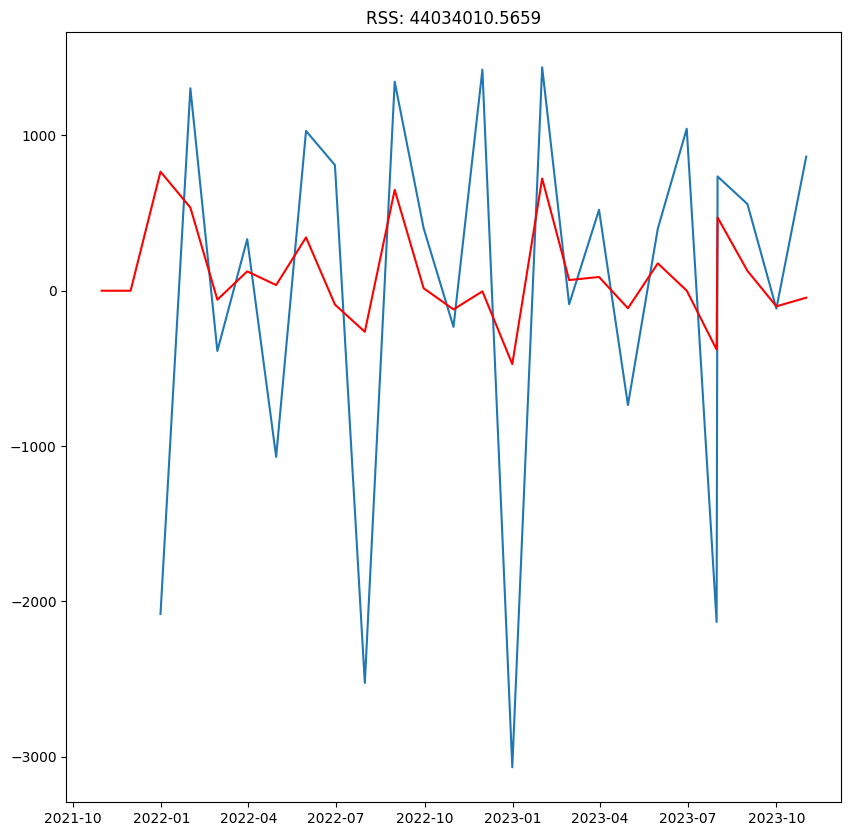

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(tu_dif, order=(1, 1, 1))
results_ARIMA = model.fit()

# Extract the values from the time series and fitted values as NumPy arrays
ts_log_diff_values = ts_log_diff.values.flatten()
fitted_values = results_ARIMA.fittedvalues.values[:len(ts_log_diff_values)]  # Trim fitted values if necessary

# Calculate the RSS using the NumPy arrays
rss = np.sum((fitted_values - ts_log_diff_values)**2)

plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f' % rss) # Use the calculated RSS value

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head(25))

date
2021-10-31      0.000000
2021-11-30      0.000000
2021-12-31    766.709782
2022-01-31    535.454304
2022-02-28    -57.654591
2022-03-31    124.628086
2022-04-30     36.435587
2022-05-31    343.433521
2022-06-30    -89.184998
2022-07-31   -264.648224
2022-08-31    649.700232
2022-09-30     16.054317
2022-10-31   -120.456817
2022-11-30     -3.984073
2022-12-31   -472.551115
2023-01-31    722.725330
2023-02-28     68.740043
2023-03-31     88.444264
2023-04-30   -112.921819
2023-05-31    176.182287
2023-06-30      0.557276
2023-07-31   -379.086715
2023-08-01    471.724136
2023-09-01    127.760886
2023-10-01   -100.549048
dtype: float64


# MIT **CODE**

# White Noise
The concept of White Noise is essential for time series analysis and forecasting. White Noise tells you if you should further optimize the model or not. White Noise is a series that’s not predictable, as it's a sequence of random numbers, i.e, the next value does not rely on the sequential past values, instead, the values occur randomly. If you build a model and its residual (the difference between predicted and actual) values look like White Noise, then you know you've done everything to make the model as good as possible. However, if there are visible patterns in the residuals, there’s potentially a better model for your dataset.

For a time series to be categorized as White Noise, the following conditions must be met:

The mean value should be zero
The standard deviation should be constant, it should not change over time
There must be zero autocorrelation at all lags
Methods for determining if a time series resembles White Noise:

By comparing the mean and standard deviation over time
By plotting the time series
By examining autocorrelation plots

# Random Walk
Random Walk time series, like White Noise, are unpredictable. However, in Random Walk, the values aren't simply a list of random numbers with no relation to their previous sequential data. In a Random Walk, the current value is dependent on the previous value along with some added noise.

In Random Walks, we can use the previous value for forecasting but this does not ensure results, because only one previous value does not guarantee the desired outcome, and the addition of white noise to the previous values makes it even more difficult. So, it is difficult to forecast Random Walks too, especially for a long period of time.

To make a dummy Random Walk series, follow the below steps:

Begin with an arbitrary value, such as zero.
The next value is the previous value plus some added random fluctuation. You can go through the procedure of adding more values as many times as you like.

     

# Stationarity MIT notebooks

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

constant mean
constant variance
an autocovariance that does not depend on time.

**Visualize Stationarity**

In [ ]:
 tu_a = ts_log_decompose.copy()

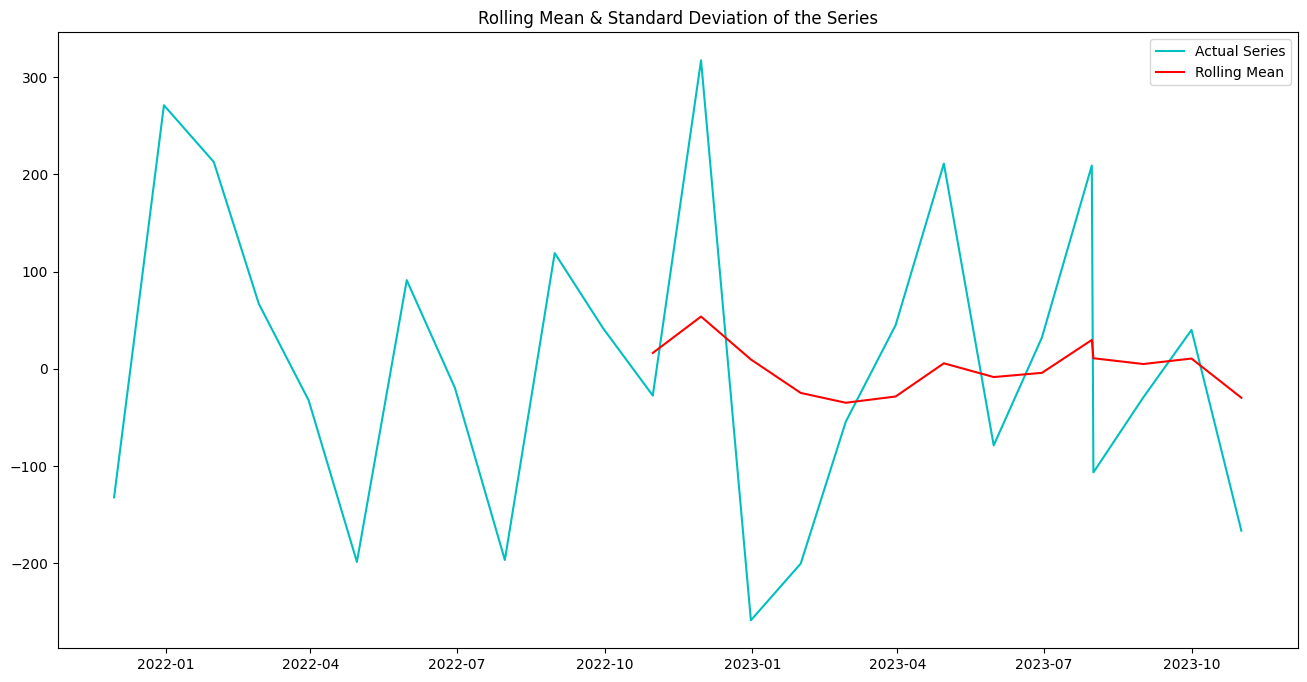

In [ ]:
# Calculating the rolling mean and standard deviation for a window of 12 observations
rolmean = tu_a.rolling(window = 12).mean()

rolstd = tu_a.rolling(window = 12).std()

# Visualizing the rolling mean and standard deviation
plt.figure(figsize = (16, 8))

actual = plt.plot(tu_a, color = 'c', label = 'Actual Series')

rollingmean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')

plt.title('Rolling Mean & Standard Deviation of the Series')

plt.legend()

plt.show()

**Test for stationarity:**


Non-stationarity in time series may appear for the following reasons:

Presence of a trend in the data
Presence of heteroskedasticity
Presence of autocorrelation
We can identify non-stationarity in the time series by performing a statistical test called the Augmented Dicky-Fuller Test.

Null Hypothesis: The time series is non stationary
Alternate Hypothesis: The time series is stationary

In [ ]:
tu_a.head()

,resid
date,
2021-11-30,-132.192739
2021-12-31,271.046205
2022-01-31,212.705878
2022-02-28,66.844719
2022-03-31,-32.495608


In [ ]:
# Importing ADF test from statsmodels package
from statsmodels.tsa.stattools import adfuller

# Implementing ADF test on the original time series data
# Assuming 'tu_a' contains the time series data you want to test
result = adfuller(tu_a)

# Printing the results
print(result[0])

print(result[1]) # To get the p-value

print(result[4])

-4.613679847142758
0.00012187446945506413
{'1%': -3.7883858816542486, '5%': -3.013097747543462, '10%': -2.6463967573696143}


In [ ]:
# Implementing ADF test on the original time series data; We can also see this
#visually by comparing the above ADF statistic and visually inspecting the time series.
result = adfuller(tu_a['resid'])

fig, ax = plt.subplots(figsize = (16, 6))

tu_a.plot(ax = ax)

plt.show()

# Printing the results
tu_a
print('ADF Statistic:', result[0])

print('p-value:', result[1])

KeyError: 'resid'

Need your p value under .05 to reject the null, series is not stationary. Need to fix.

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss
df = train_data_all.reset_index()
df.columns = ['date', 'value']
df.set_index('date', inplace=True)

# ADF Test want results under .05 to reject the null that the data is not stationary
result = adfuller(df.value.values, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test   The null hypothesis and the P-Value interpretation is just the opposite of ADH test. want to accept the null.
result = kpss(df.value.values, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -1.1029788851271738
p-value: 0.7138824993076537
Critial Values:
   1%, -3.5274258688046647
Critial Values:
   5%, -2.903810816326531
Critial Values:
   10%, -2.5893204081632653

KPSS Statistic: 1.203585
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


Test for Seasonality  -- ACF and PACF plots (autocorrelation)

In [ ]:
# Creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Creating and plotting the ACF charts starting from lag = 1
tsaplots.plot_acf(train_data_stationary, zero = False, ax = ax1)

# Creating and plotting the ACF charts starting from lag = 1 till lag = 8
tsaplots.plot_pacf(train_data_stationary, zero = False, ax = ax2, lags = 8)

plt.show()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

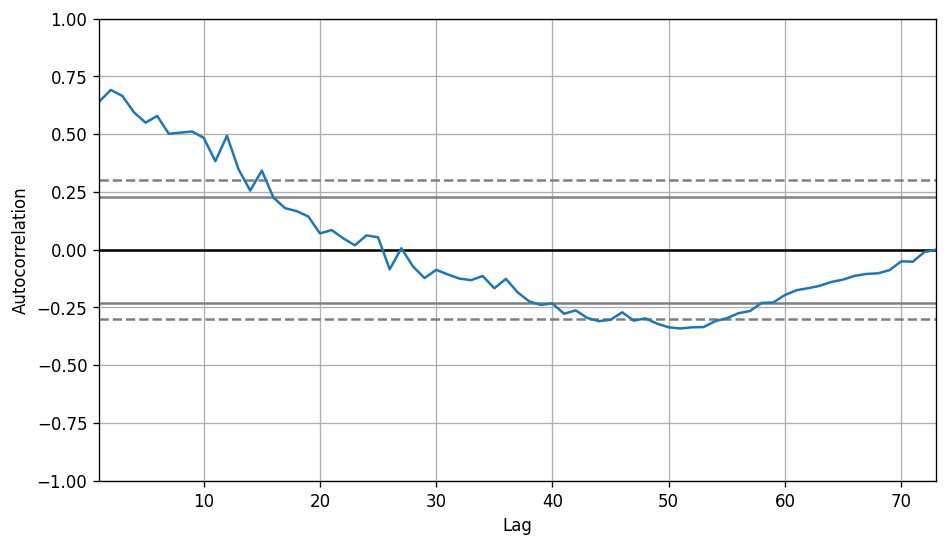

In [ ]:
from pandas.plotting import autocorrelation_plot


# Draw Plot
plt.rcParams.update({'figure.figsize':(9,5), 'figure.dpi':120})
autocorrelation_plot(df.units.tolist())

**Dealing with issues:**
Correcting for trends and Seasonality

**Detrending Data**

**Detrending Data  **
Detrending a time series is to remove the trend component from a time series. But how to extract the trend? There are multiple approaches.

Subtract the line of best fit from the time series. The line of best fit may be obtained from a linear regression model with the time steps as the predictor. For more complex trends, you may want to use quadratic terms (x^2) in the model.
Subtract the trend component obtained from time series decomposition we saw earlier.
Subtract the mean
Apply a filter like Baxter-King filter(statsmodels.tsa.filters.bkfilter) or the Hodrick-Prescott Filter (statsmodels.tsa.filters.hpfilter) to remove the moving average trend lines or the cyclical components.

In [ ]:
# Using scipy: Subtract the line of best fit
from scipy import signal

detrended = signal.detrend(train_data_2.values)
plt.plot(detrended)
plt.title('Sales detrended by subtracting the least squares fit', fontsize=16)

TypeError: float() argument must be a string or a real number, not 'Timestamp'

Text(0.5, 1.0, 'Sales detrended by subtracting the trend component')

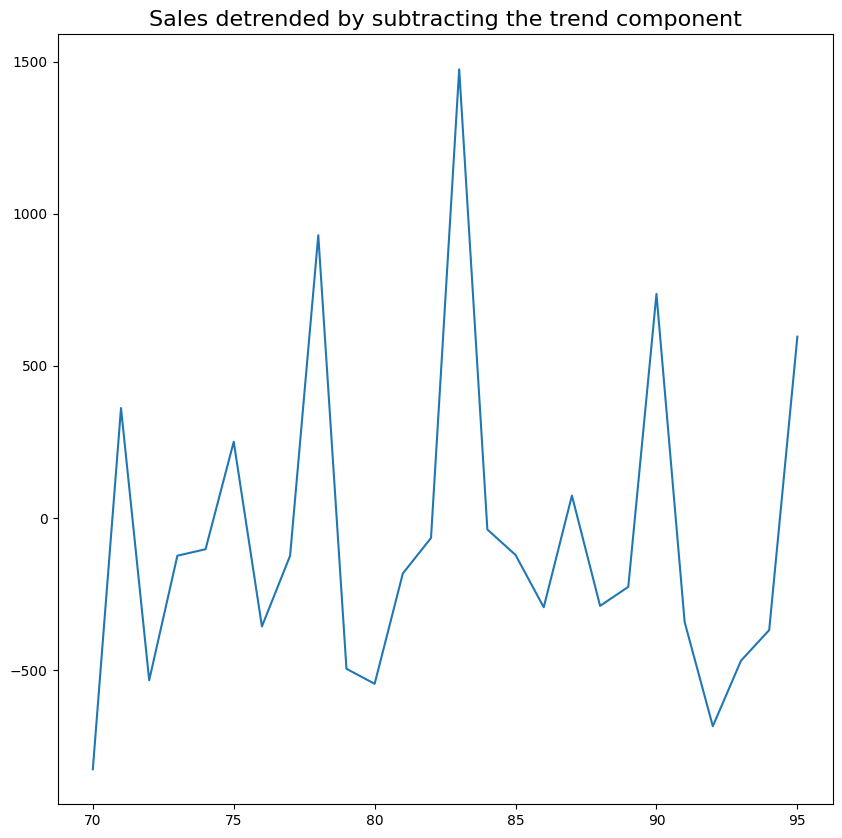

In [ ]:
# Using statmodels: Subtracting the Trend Component.
from statsmodels.tsa.seasonal import seasonal_decompose

result_mul = seasonal_decompose(train_data_2['units'], model='multiplicative', extrapolate_trend='freq', period=12)
detrended = train_data_2.units.values - result_mul.trend
plt.plot(detrended)
plt.title('Sales detrended by subtracting the trend component', fontsize=16)

 Boxcox for the transformation will produce optimal value of lambda for transformation**

Lambda: 0.204411


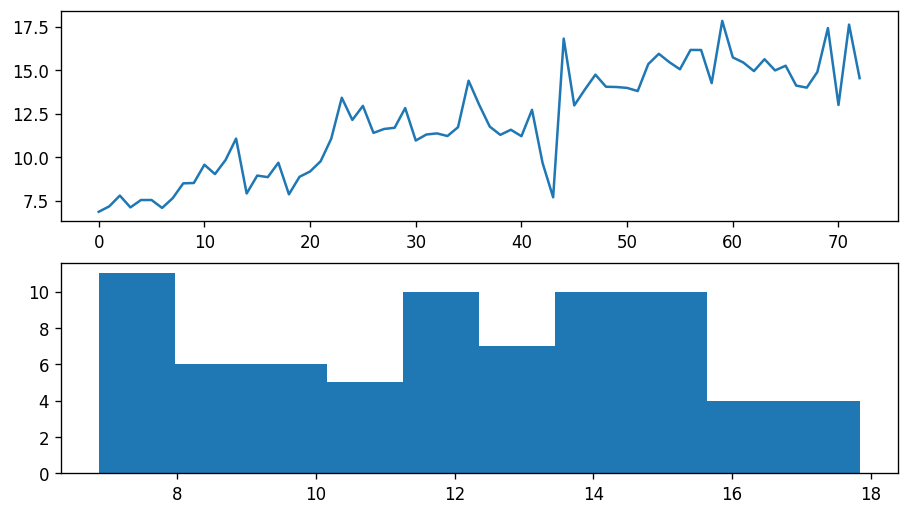

In [ ]:
#box cox
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = DataFrame(train_data_alt['units'])
dataframe = DataFrame(series.values)
dataframe.columns = ['units']
dataframe['units'], lam = boxcox(dataframe['units'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['units'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['units'])
pyplot.show()

In [ ]:
train_data_alt = train_data_all.reset_index()
#train_data_all=train_data_all.set_index('date')
columns_to_keep = ['date','units', 'index']
train_data_alt= train_data_alt[columns_to_keep]
train_data_alt.columns = ['date', 'units', 'index']
train_data_alt['units'] = train_data_all['units'].astype(int)

train_data_alt['date'] = pd.to_datetime(train_data_all['date'])
train_data_alt['index']=train_data_alt.set_index('date')
train_data_alt.head()

The linear trend is given by F(t) = -5.082393162393158*t + (1666.3743589743585)


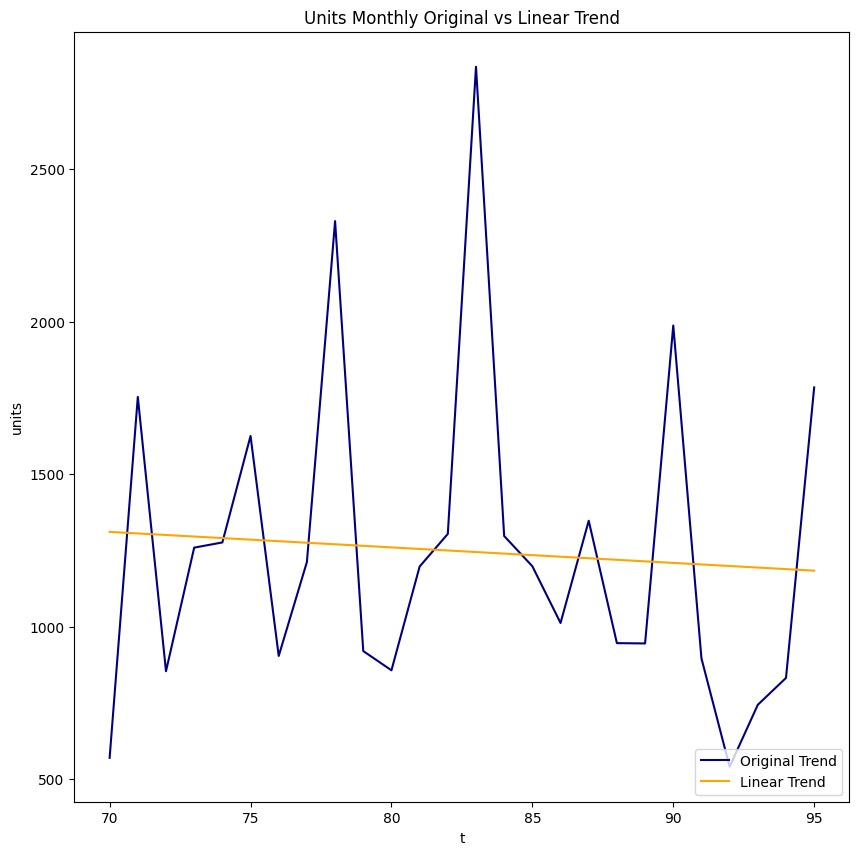

In [ ]:
#linear fit on the data/visualize the transformation fit:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(np.array(train_data_2.index).reshape(-1, 1), train_data_2.units)

coefficients = [model.coef_[0], model.intercept_]

print("The linear trend is given by F(t) = " +str(coefficients[0]) + "*t + (" +str (coefficients[1]) + ")")

linear_cpi = model.predict(np.array(train_data_2.index).reshape(-1, 1))

plt.plot(train_data_2.index, train_data_2.units, color = 'navy', label = 'Original Trend')

plt.xlabel('t')

plt.ylabel('units')

plt.title('Units Monthly Original vs Linear Trend')

plt.plot(train_data_2.index, linear_cpi, color = 'orange', label = 'Linear Trend')

plt.legend(loc = 'lower right')

plt.show()

This log transforms and detrends data:

In [ ]:
test_data_alt =test_data_all.reset_index()
#train_data_all=train_data_all.set_index('date')
columns_to_keep = ['date','units', 'index']
test_data_alt= test_data_alt[columns_to_keep]
test_data_alt.columns = ['date', 'units', 'index']
test_data_alt['units'] = test_data_alt['units'].astype(int)

test_data_alt['date'] = pd.to_datetime(test_data_alt['date'])
test_data_alt = test_data_alt.set_index('date') # Set the index directly
test_data_alt.head()

,units,index
date,,
2022-01-31,1259,73
2022-02-28,1276,74
2022-03-31,1625,75
2022-04-30,904,76
2022-05-31,1212,77


In [ ]:
x = input('Choose Method:')

Choose Method:linear


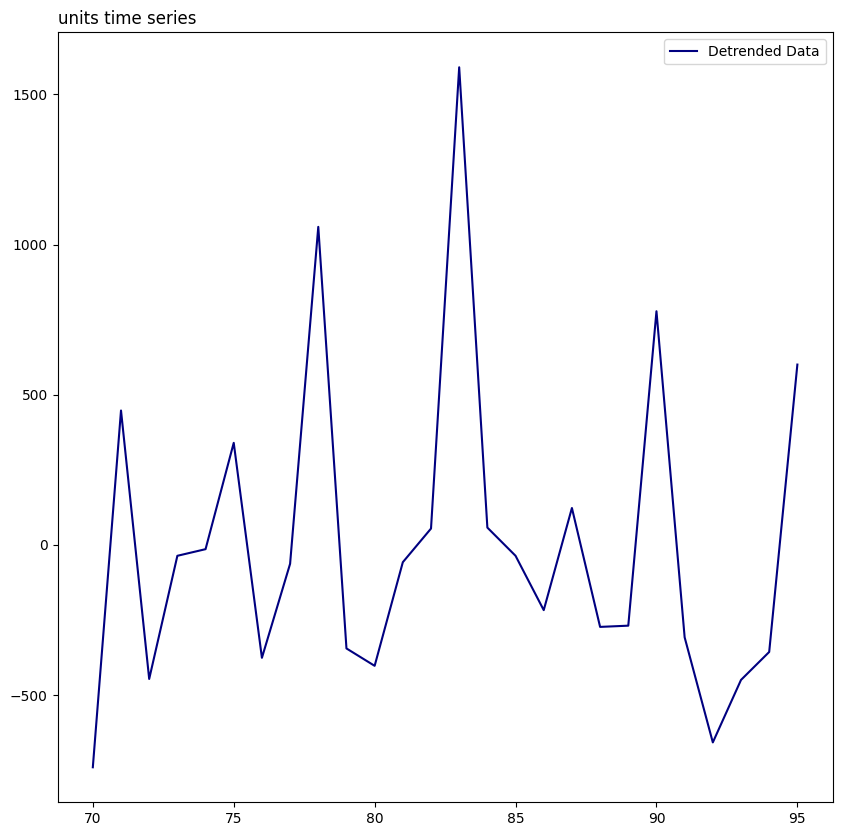

In [ ]:
if x == 'linear':
    remaining = train_data_2.units - linear_cpi

    linear_cpi_test = model.predict(np.array(test_data_2.index).reshape(-1, 1))

    remaining = train_data_2.units - linear_cpi

    linear_cpi_test = model.predict(np.array(test_data_2.index).reshape(-1, 1))

    remaining_test = test_data_2.units - linear_cpi_test

    test = test_data_2.index

    train = train_data_2.index

else:
    cpi_diff = np.log(units.units).diff()

    remaining = cpi_diff[0 : train_data_2.shape[0]]

    remaining.iloc[0] = 0

    remaining_test = cpi_diff[train_data_2.shape[0]:].dropna()

    remaining_test.iloc[0] = 0

    test = test_data_2.index

    train = train_data_2.index

plt.plot(train, remaining, color = "navy", label = 'Detrended Data')

plt.title('units time series', loc = 'left')

plt.legend(loc = 'upper right')

plt.show()

In [ ]:
# Let us now create a function that would add the trend back

def rebuild_diffed(series, first_element_original, x, linear_trend):
    if x == 'linear':
        final = series + linear_trend

    else:
        cumsum = pd.Series(series).cumsum()

        final = np.exp(cumsum.fillna(0) + first_element_original)

        if first_element_original == 0:
            final = np.exp(cumsum.fillna(0))

    return final

In [ ]:
#ACF and PAC Plot Check (just continuing with the example, this doesnt follow the notebook)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(remaining)

plt.show()

plot_pacf(remaining)

plt.show()

AR/MA ARMA ARIMA Modeling

Test RMSE for AR(1):518.7669669256038
Test RMSE for AR(2):542.9839205125646
Test RMSE for AR(3):637.0908377635086
Test RMSE for AR(4):720.7934771753825
Test RMSE for AR(5):688.4211652170628


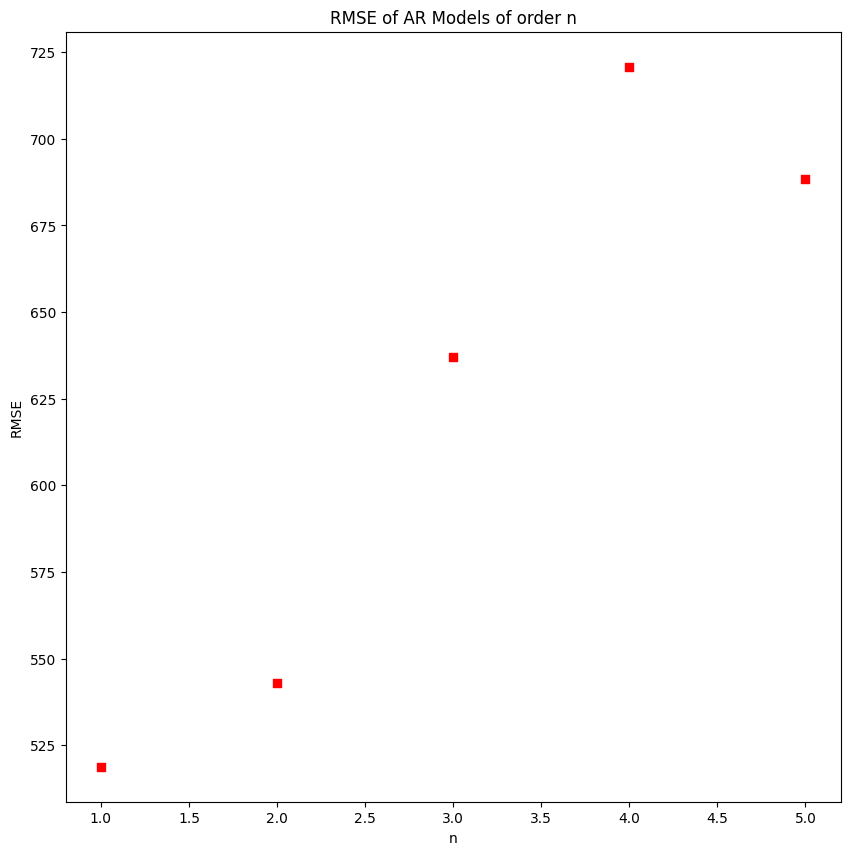

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import mean_squared_error

n = 2

rmse_ar = []

for n in range(1, 6):
    model = AutoReg(remaining, lags = n)

    model_fit = model.fit()

    coef = model_fit.params

    past = remaining[len(remaining) - n:].values

    past = [past[i] for i in range(len(past))]

    test_predictions = list()

    for t in range(len(remaining_test)):
        length = len(past)

        lag = [past[i] for i in range(length - n, length)]

        pred = coef[0]

        for d in range(n):

            pred += coef[d+1] * lag[n - d - 1]

        obs = remaining_test.values[t]

        test_predictions.append(pred)

        past.append(obs)

    rmse = (mean_squared_error(remaining_test, test_predictions)) ** 0.5

    rmse_ar.append(rmse)

    print('Test RMSE for AR(' + str(n) +'):' + str(rmse))

plt.scatter(np.arange(1,6), rmse_ar,marker = "s", color = 'red')

plt.xlabel("n")

plt.ylabel("RMSE")

plt.title("RMSE of AR Models of order n")

plt.show()

Ar mdoel 1 has the least error...

In [ ]:
## Building the AR(2) Model
n = 1

AR2_model = AutoReg(remaining, lags = n).fit()

coef = AR2_model.params

# Walk forward over time steps in test
past = remaining[len(remaining)-n:].values

past = [past[i] for i in range(len(past))]

test_predictions = list()

training_predictions = AR2_model.predict(start = train[0], end = train[-1])

for t in range(len(remaining_test)):
    length = len(past)

    lag = [past[i] for i in range(length - n , length)]

    pred = coef[0]

    for d in range(n):
        pred += coef[d+1] * lag[n-d-1]

    obs = remaining_test.values[t]

    test_predictions.append(pred)

    past.append(obs)

final_training = (rebuild_diffed(training_predictions, np.log(train_data_2.units.iloc[0]), x, linear_cpi))

final_test = (rebuild_diffed(test_predictions, np.log(train_data_2.iloc[-1].units), x, linear_cpi_test))

Text(0.5, 1.0, 'units predictions')

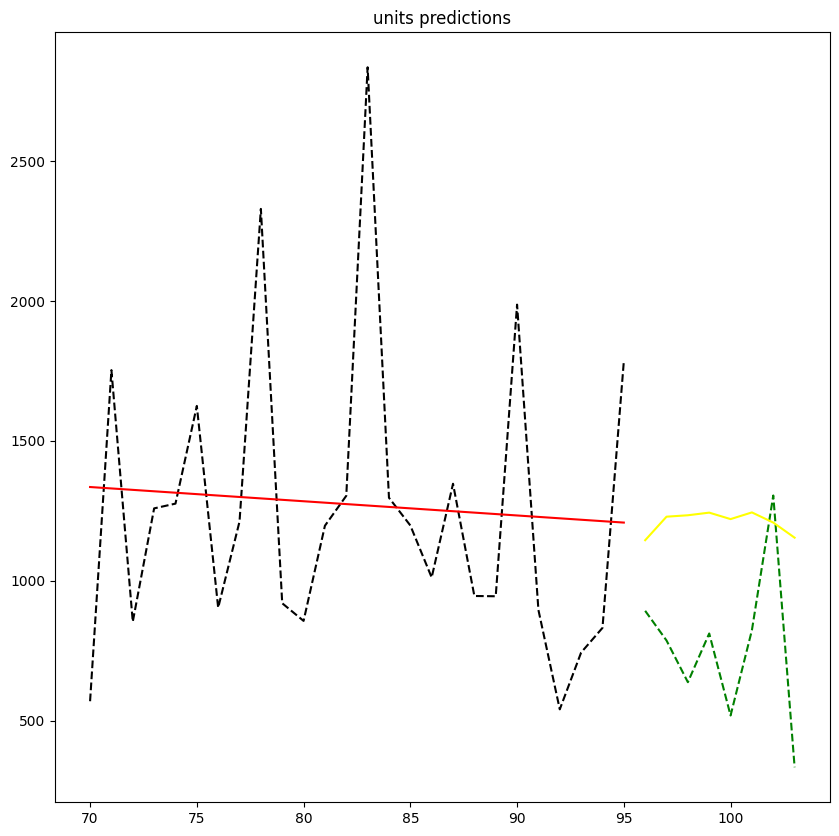

In [ ]:
plt.plot(train_data_2.index, train_data_2.units, color = 'black', linestyle = 'dashed', label = 'Training')

plt.plot(test_data_2.index, test_data_2.units, color = 'green', linestyle = 'dashed', label = 'Test')

plt.plot(train_data_2.index, final_training, color = 'red', label = 'Final AF')

plt.plot(test_data_2.index, final_test, color = 'yellow', label = 'Final AF')

plt.title("units predictions")

In [ ]:
print(train_data_2)

         date  units  year month
70 2021-10-31    570  2021   Oct
71 2021-11-30   1753  2021   Nov
72 2021-12-31    854  2021   Dec
73 2022-01-31   1259  2022   Jan
74 2022-02-28   1276  2022   Feb
75 2022-03-31   1625  2022   Mar
76 2022-04-30    904  2022   Apr
77 2022-05-31   1212  2022   May
78 2022-06-30   2329  2022   Jun
79 2022-07-31    920  2022   Jul
80 2022-08-31    857  2022   Aug
81 2022-09-30   1197  2022   Sep
82 2022-10-31   1304  2022   Oct
83 2022-11-30   2835  2022   Nov
84 2022-12-31   1297  2022   Dec
85 2023-01-31   1198  2023   Jan
86 2023-02-28   1012  2023   Feb
87 2023-03-31   1347  2023   Mar
88 2023-04-30    946  2023   Apr
89 2023-05-31    945  2023   May
90 2023-06-30   1987  2023   Jun
91 2023-07-31    896  2023   Jul
92 2023-08-01    541  2023   Aug
93 2023-09-01    744  2023   Sep
94 2023-10-01    832  2023   Oct
95 2023-11-01   1784  2023   Nov


In [ ]:
td = train_data_2.drop(columns=['year', 'month'])

In [ ]:
print(td)
#td.set_index('date', inplace=True)

            units
date             
2021-10-31    570
2021-11-30   1753
2021-12-31    854
2022-01-31   1259
2022-02-28   1276
2022-03-31   1625
2022-04-30    904
2022-05-31   1212
2022-06-30   2329
2022-07-31    920
2022-08-31    857
2022-09-30   1197
2022-10-31   1304
2022-11-30   2835
2022-12-31   1297
2023-01-31   1198
2023-02-28   1012
2023-03-31   1347
2023-04-30    946
2023-05-31    945
2023-06-30   1987
2023-07-31    896
2023-08-01    541
2023-09-01    744
2023-10-01    832
2023-11-01   1784


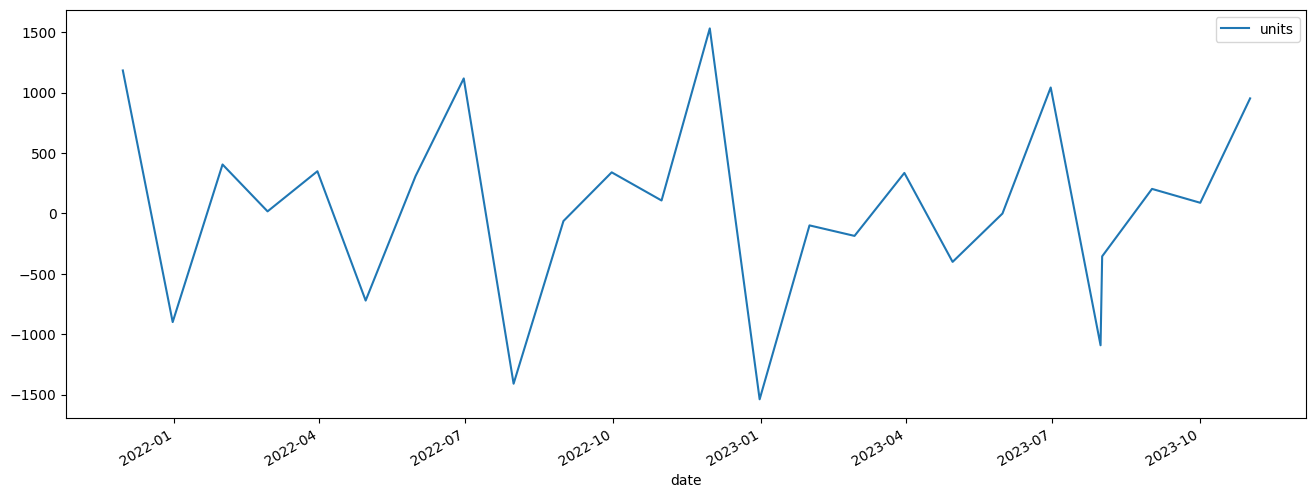

ADF Statistic: -4.575762309615806
p-value: 0.00014312950420669712


In [ ]:
# Taking the 1st order differencing of the timeseries
# Taking the 1st order differencing of the timeseries

# Initialize train_data_stationary as a copy of td
train_data_stationary = td.copy()

train_data_stationary['units'] = train_data_stationary['units'].diff() # Apply differencing only to 'units' column
#train_data_stationary = train_data_stationary.reset_index() # Create a copy to avoid modifying original data, call reset_index with parentheses

# Implementing ADF test on the first order differenced time series data
result = adfuller(train_data_stationary.dropna()['units'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

In [ ]:
# We are using the ARIMA function to build the AR model, so we need to pass the stationary time series that we got after triple
# differencing the original time series. Also, we will keep the q parameter as 0, so that the model acts as an AR model
# train_data_stationary = train_data_stationary.astype(float) # Remove this line, as it's causing the error
# Creating an AR model with parameter p = 1
ar_1_model = ARIMA(train_data_stationary['units'], order = (1, 0, 0)) # Pass only the 'units' column

# Creating an AR model with parameter p = 2
ar_2_model = ARIMA(train_data_stationary['units'], order = (2, 0, 0)) # Pass only the 'units' column

# Creating an AR model with parameter p = 3
ar_3_model = ARIMA(train_data_stationary['units'], order = (3, 0, 0)) # Pass only the 'units' column

# Creating an AR model with parameter p = 4
ar_4_model = ARIMA(train_data_stationary['units'], order = (4, 0, 0)) # Pass only the 'units' column

In [ ]:
# Fitting all the models that we implemented in the above cell

ar_1_results = ar_1_model.fit()

ar_2_results = ar_2_model.fit()

ar_3_results = ar_3_model.fit()

ar_4_results = ar_4_model.fit()

In [ ]:
ar_3_results.predict(start = 19, end = 40)

,predicted_mean
19,180.901583
20,123.150991
21,-621.201484
22,249.610649
23,530.869970
24,384.334874
25,-52.068986
26,-786.779911
27,49.846230
28,103.441393


In [ ]:
np.cumsum(np.cumsum(ar_3_results.predict(start = 19, end = 40)))

,predicted_mean
19,180.901583
20,484.954157
21,167.805248
22,100.266987
23,563.598697
24,1411.265280
25,2206.862877
26,2215.680563
27,2274.344480
28,2436.449789


In [ ]:
predictions = np.cumsum(np.cumsum(np.cumsum(ar_1_results.predict(start = 19, end = 25)))) + train_data_2.iloc[-1, 0].timestamp()
# Convert the Timestamp object to a Unix timestamp (float) before adding it to the NumPy array
predictions

,predicted_mean
date,
2023-05-31,1.698797e+09
2023-06-30,1.698797e+09
2023-07-31,1.698798e+09
2023-08-01,1.698798e+09
2023-09-01,1.698800e+09
2023-10-01,1.698801e+09
2023-11-01,1.698803e+09


In [ ]:
predictions = np.cumsum(np.cumsum(np.cumsum(ar_1_results.predict(start = 19, end = 25)))) + train_data_stationary.iloc[-1][0]
predictions

,predicted_mean
date,
2023-05-31,1165.986316
2023-06-30,1627.892494
2023-07-31,1902.164480
2023-08-01,2513.379618
2023-09-01,3654.818158
2023-10-01,5268.586731
2023-11-01,7348.557141


In [ ]:
rmse = mean_squared_error(td.units,final_test) ** 0.5

print("The rmse of the final fit is " + str(rmse))

ValueError: Found input variables with inconsistent numbers of samples: [26, 8]

In [ ]:
# Assuming 'final_test' should contain the predictions for the same time period as 'td.units'
# Adjust the start and end parameters in your prediction to match the length of 'td.units'

predictions = np.cumsum(np.cumsum(np.cumsum(ar_1_results.predict(start = 0,
                                                                  end = len(td.units) - 1)))) \
               + train_data_stationary.iloc[-1][0]

# Now calculate RMSE with the adjusted predictions
rmse = mean_squared_error(td.units, predictions) ** 0.5

print("The rmse of the final fit is " + str(rmse))

The rmse of the final fit is 8228.965619195515


Alternate transformation method - BOX COX

In [ ]:

from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = DataFrame(train_data_alt['units'])
dataframe = DataFrame(series.values)
dataframe.columns = ['units']
dataframe['units'], lam = boxcox(dataframe['units'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['units'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['units'])
pyplot.show()

Non Stationary:
 If the time series is non-stationary, then we need to make it stationary by differencing the data. The number of times we take a difference of the data is a parameter used in ARIMA models

In [ ]:
# Taking the 1st order differencing of the timeseries
train_data_stationary = train_data_alt.diff().dropna()

# Implementing ADF test on the first order differenced time series data
result = adfuller(train_data_stationary['units'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

still over .05, no dice, had to second order last time

In [ ]:
# Taking the 2nd order differencing of the time series
train_data_stationary = train_data_alt.diff().diff().dropna()

# Implementing ADF test on the second order differenced time series data
result = adfuller(train_data_stationary['units'])

fig, ax = plt.subplots(figsize = (16, 6))

train_data_stationary.plot(ax = ax)

plt.show()

# Printing the results

print('ADF Statistic:', result[0])

print('p-value:', result[1])

.0000.... something, under .05, go with the second order difference.
d = 2 for the ARIMA*

# ACF and PACF Plots
ACF and PACF plots are used to identify the model's order in ARIMA models. These plots help to find the parameters p and q. Also, we always plot the ACF and PACF plots after making the time series stationary.

In [ ]:
# Creating two subplots to show ACF and PACF plots
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (16, 6))

# Creating and plotting the ACF charts starting from lag = 1
tsaplots.plot_acf(train_data_stationary, zero = False, ax = ax1)

# Creating and plotting the ACF charts starting from lag = 1 till lag = 8
tsaplots.plot_pacf(train_data_stationary, zero = False, ax = ax2, lags = 8)

plt.show()

**thats a pattern for the partial autocorrelation. **

Trend

Direction of the series over time, can be upwards, horizontal or unchanging, or decreasing/downwards

Seasonality

STEPS ARE WORKING ABOVE** **bold text**

No matter what, there IS clear seasonality (Graph 2 above, it looks like a repeated heart beat at a perfect interval), obvious upwards trend, need to figure out how to read the random white noise part.

**Facebook Prophet models for time series analysis:**

In [ ]:
from prophet import Prophet
from datetime import datetime
from prophet.plot import plot_plotly, plot_components_plotly

In [ ]:
train_data_alta['date'] = pd.to_datetime(train['date'])

In [ ]:
# Rename the columns in your training data
train_data_alta = train_data_all.copy().rename(columns={'date': 'ds', 'y': 'y'})

# Initialize model
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True,daily_seasonality=True)
# Add monthly seasonality to the model
m.add_seasonality(name='monthly', period=30.5, fourier_order=5, prior_scale=0.02)
# Fit the model with training data and make prediction
m.fit(train_data_alta)
future = m.make_future_dataframe(periods=30, freq='M')
forecast = m.predict(future)
fig = m.plot_components(forecast)

In [ ]:
figure = m.plot(forecast)

In [ ]:
plot_plotly(m, forecast)

In [ ]:
# Calculate the number of months in test_data_all
num_test_months = len(test_data_all)

# Extract the corresponding number of predictions from the tail of forecast.yhat
y_pred = forecast.yhat.tail(num_test_months)

# Now calculate the R^2 score
r2_score(y_true, y_pred)

Accuracy is pretty bad

In [ ]:
from prophet import Prophet

# Create a DataFrame with holidays
holidays = pd.DataFrame({
  'holiday': 'christmas',
  'ds': pd.to_datetime(['2024-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

# Initialize the model
model = Prophet(holidays=holidays)

# Fit the model with your data
model.fit(train_data_alta)

# Create future DataFrame and make predictions
future = model.make_future_dataframe(periods=48)
forecast = model.predict(future)

In [ ]:
from prophet import Prophet

# Create a DataFrame with holidays
holidays = pd.DataFrame({
  'holiday': 'christmas',
  'ds': pd.to_datetime(['2024-12-25']),
  'lower_window': 0,
  'upper_window': 1,
})

# Initialize the model
model = Prophet(holidays=holidays)

# Fit the model with your data
model.fit(train_data_alta)

# Create future DataFrame and make predictions
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [ ]:
train_data_alta['is_holiday'] = (train_data_alta['ds'].isin(holidays)).astype(int)


In [ ]:
import pandas as pd
from prophet import Prophet

# Create the training data DataFrame
# Assume 'train_data_all' is already defined and has 'ds' (date) and 'y' (value) columns

# Define the holidays
holidays = pd.DataFrame({
    'holiday': 'holiday_name',
    'ds': pd.to_datetime(['2024-12-25', '2024-11-29']),  # Example holidays
    'lower_window': 0,
    'upper_window': 1,
})

# Initialize the Prophet model with holidays
model = Prophet(holidays=holidays)

# Fit the model
model.fit(train_data_alta)

# Create future DataFrame
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot the forecast components
fig = model.plot_components(forecast)
